In [1]:
# Import necesscary packages.
import os

import earthpy as et
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
import geopandas as gpd
import folium
import seaborn as sns
from scipy.stats import linregress
from datetime import datetime, timedelta
from matplotlib.lines import Line2D
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import linregress
import calendar

In [2]:
# Set working directory.
temp_path = os.path.join(
    et.io.HOME,
    'Masters')
# Check if the path exists, if not create it.
if os.path.exists(temp_path):
    os.chdir(temp_path)
else:
    print('This path does not exist')
os.getcwd()

'/Users/rebeccamchugh/Masters'

In [3]:
# Import csv files for temperature data.
temp_dir = glob(os.path.join('air-temp-raw-data-2022-2023', '*'))
temp_dir

['air-temp-raw-data-2022-2023/updated_data_2023.csv',
 'air-temp-raw-data-2022-2023/tree_abundance .csv',
 'air-temp-raw-data-2022-2023/data_2022.csv',
 'air-temp-raw-data-2022-2023/data_2023.csv',
 'air-temp-raw-data-2022-2023/variables.csv',
 'air-temp-raw-data-2022-2023/ground_veg_15m.csv',
 'air-temp-raw-data-2022-2023/sensor_gps.csv']

In [4]:
# Import data for 2022 
csv_data_2022 = pd.read_csv('air-temp-raw-data-2022-2023/data_2022.csv')
csv_data_2022['date_time'] = pd.to_datetime(csv_data_2022['date_time'])
csv_data_2022

# Drop rows with NaN values in the 'temp_fahrenheit' column
csv_data_2022 = csv_data_2022.dropna(subset=['temp_fahrenheit'])
csv_data_2022


,index,date_time,temp_fahrenheit,Time of Day,sensor_number
0,193,2022-05-27 00:00:00,64.886,Night,sensor_001
1,194,2022-05-27 00:05:00,64.742,Night,sensor_001
2,195,2022-05-27 00:10:00,64.436,Night,sensor_001
3,196,2022-05-27 00:15:00,64.112,Night,sensor_001
4,197,2022-05-27 00:20:00,64.040,Night,sensor_001
...,...,...,...,...,...
2174041,2218929,2022-11-07 09:30:00,43.664,Day,sensor_043
2174042,2218930,2022-11-07 09:35:00,44.420,Day,sensor_043
2174043,2218931,2022-11-07 09:40:00,44.744,Day,sensor_043
2174044,2218932,2022-11-07 09:45:00,44.348,Day,sensor_043


In [6]:
# Assuming 'your_dataframe' is the DataFrame you want to export
# column_to_drop = 'Time of Day'  # Replace with the actual column name you want to drop

# csv_data_2022 = csv_data_2022.drop(column_to_drop, axis=1)
# csv_data_2022.to_csv('2022_air_temp.csv', index=False)
# csv_data_2022

In [7]:
# # 2023 data didnt have all sensors??
# new2023 = pd.read_csv('air-temp-raw-data-2022-2023/alltemps_2023')

# # Daily mean 2023
# # Convert 'date_time' to a datetime object
# new2023['date_time'] = pd.to_datetime(new2023['date_time'])

# # Calculate the daily max temperature for each sensor, time of day, and day
# new2023['daily_mean_temp'] = new2023.groupby(['sensor_number', 'Time of Day', new2023['date_time'].dt.date])['temp_fahrenheit'].transform('mean')

# # Print the DataFrame with the new 'daily_mean_temp' column
# new2023
# # Monthly mean/mean 2023
# # Calculate the daily maximum temperature for each sensor and time of day
# new2023['month'] = new2023['date_time'].dt.month
# new2023.groupby(['month', 'sensor_number', 'Time of Day', 'daily_mean_temp'])

# # Calculate the monthly mean temperature for each sensor and time of day
# # Calculate the monthly mean temperature for each sensor and time of day
# monthly_mean_temperatures = new2023.groupby(['month', 'sensor_number', 'Time of Day'])['daily_mean_temp'].mean().reset_index()

# # Merge the two DataFrames based on the common columns (month, sensor_number, and Time of Day)
# monthly_mean_2023_new = pd.merge(new2023, monthly_mean_temperatures, on=['month', 'sensor_number', 'Time of Day'], suffixes=('_', '_monthly_mean'))

# monthly_mean_2023_new

# #Merge variables and temp data
# # Add "sensor_" prefix to the ID column in variables DataFrame
# variables['ID'] = 'sensor_' + variables['ID'].astype(str)
# #Merge the two DataFrames on 'sensor_number' and 'ID'
# merged_data = pd.merge(monthly_mean_2023_new, variables, left_on='sensor_number', right_on='ID')

# #merged_data
# merged_data

In [5]:
# Import data for 2023 
csv_data_2023 = pd.read_csv('air-temp-raw-data-2022-2023/updated_data_2023.csv')
csv_data_2023['date_time'] = pd.to_datetime(csv_data_2023['date_time'])
csv_data_2023

,date_time,temp_f,Time of Day,sensor_number
0,2023-07-01 00:00:00,53.50,Night,sensor_044a
1,2023-07-01 00:05:00,54.80,Night,sensor_044a
2,2023-07-01 00:10:00,54.40,Night,sensor_044a
3,2023-07-01 00:15:00,54.10,Night,sensor_044a
4,2023-07-01 00:20:00,56.40,Night,sensor_044a
...,...,...,...,...
1548511,2023-07-19 09:35:00,78.87,Day,sensor_043
1548512,2023-07-19 09:40:00,78.87,Day,sensor_043
1548513,2023-07-19 09:45:00,78.87,Day,sensor_043
1548514,2023-07-19 09:50:00,79.18,Day,sensor_043


In [9]:
#print(merged_data['sensor_number'].unique())


In [10]:
# Get the daily max 

# Assuming you have a DataFrame called csv_data_2022
# Replace 'csv_data_2022' with your actual DataFrame name

# Convert 'date_time' to a datetime object
csv_data_2022['date_time'] = pd.to_datetime(csv_data_2022['date_time'])

# Calculate the daily max temperature for each sensor, time of day, and day
csv_data_2022['daily_max_temp'] = csv_data_2022.groupby(['sensor_number', 'Time of Day', csv_data_2022['date_time'].dt.date])['temp_fahrenheit'].transform('max')

# Print the DataFrame with the new 'daily_max_temp' column
csv_data_2022

,date_time,temp_fahrenheit,Time of Day,sensor_number,daily_max_temp
0,2022-05-26 08:00:00,60.188,Day,sensor_001,83.894
1,2022-05-26 08:05:00,63.806,Day,sensor_001,83.894
2,2022-05-26 08:10:00,64.112,Day,sensor_001,83.894
4,2022-05-26 08:15:00,63.734,Day,sensor_001,83.894
5,2022-05-26 08:20:00,62.960,Day,sensor_001,83.894
...,...,...,...,...,...
1637235,2022-11-07 09:30:00,43.664,Day,sensor_043,44.744
1637236,2022-11-07 09:35:00,44.420,Day,sensor_043,44.744
1637237,2022-11-07 09:40:00,44.744,Day,sensor_043,44.744
1637238,2022-11-07 09:45:00,44.348,Day,sensor_043,44.744


In [11]:
# Calculate the daily maximum temperature for each sensor and time of day
csv_data_2022['month'] = csv_data_2022['date_time'].dt.month
csv_data_2022.groupby(['month', 'sensor_number', 'Time of Day', 'daily_max_temp'])

# Calculate the monthly mean temperature for each sensor and time of day
# Calculate the monthly mean temperature for each sensor and time of day
monthly_mean_temperatures = csv_data_2022.groupby(['month', 'sensor_number', 'Time of Day'])['daily_max_temp'].mean().reset_index()

# Merge the two DataFrames based on the common columns (month, sensor_number, and Time of Day)
monthly_max_2022 = pd.merge(csv_data_2022, monthly_mean_temperatures, on=['month', 'sensor_number', 'Time of Day'], suffixes=('_', '_monthly_mean'))

monthly_max_2022


,date_time,temp_fahrenheit,Time of Day,sensor_number,daily_max_temp_,month,daily_max_temp_monthly_mean
0,2022-05-26 08:00:00,60.188,Day,sensor_001,83.894,5,74.966000
1,2022-05-26 08:05:00,63.806,Day,sensor_001,83.894,5,74.966000
2,2022-05-26 08:10:00,64.112,Day,sensor_001,83.894,5,74.966000
3,2022-05-26 08:15:00,63.734,Day,sensor_001,83.894,5,74.966000
4,2022-05-26 08:20:00,62.960,Day,sensor_001,83.894,5,74.966000
...,...,...,...,...,...,...,...
1545182,2022-11-07 09:30:00,43.664,Day,sensor_043,44.744,11,56.619496
1545183,2022-11-07 09:35:00,44.420,Day,sensor_043,44.744,11,56.619496
1545184,2022-11-07 09:40:00,44.744,Day,sensor_043,44.744,11,56.619496
1545185,2022-11-07 09:45:00,44.348,Day,sensor_043,44.744,11,56.619496


In [6]:
# Daily max 2023 
# Convert 'date_time' to a datetime object
csv_data_2023['date_time'] = pd.to_datetime(csv_data_2023['date_time'])

# Calculate the daily max temperature for each sensor, time of day, and day
csv_data_2023['daily_max_temp'] = csv_data_2023.groupby(['sensor_number', 'Time of Day', csv_data_2023['date_time'].dt.date])['temp_f'].transform('max')

# Print the DataFrame with the new 'daily_max_temp' column
csv_data_2023

,date_time,temp_f,Time of Day,sensor_number,daily_max_temp
0,2023-07-01 00:00:00,53.50,Night,sensor_044a,70.40
1,2023-07-01 00:05:00,54.80,Night,sensor_044a,70.40
2,2023-07-01 00:10:00,54.40,Night,sensor_044a,70.40
3,2023-07-01 00:15:00,54.10,Night,sensor_044a,70.40
4,2023-07-01 00:20:00,56.40,Night,sensor_044a,70.40
...,...,...,...,...,...
1548511,2023-07-19 09:35:00,78.87,Day,sensor_043,79.18
1548512,2023-07-19 09:40:00,78.87,Day,sensor_043,79.18
1548513,2023-07-19 09:45:00,78.87,Day,sensor_043,79.18
1548514,2023-07-19 09:50:00,79.18,Day,sensor_043,79.18


In [ ]:
# Monthly max/mean 2023
# Calculate the daily maximum temperature for each sensor and time of day
csv_data_2023['month'] = csv_data_2023['date_time'].dt.month
csv_data_2023.groupby(['month', 'sensor_number', 'Time of Day', 'daily_max_temp'])

# Calculate the monthly mean temperature for each sensor and time of day
# Calculate the monthly mean temperature for each sensor and time of day
monthly_mean_temperatures = csv_data_2023.groupby(['month', 'sensor_number', 'Time of Day'])['daily_max_temp'].mean().reset_index()

# Merge the two DataFrames based on the common columns (month, sensor_number, and Time of Day)
monthly_max_2023 = pd.merge(csv_data_2023, monthly_mean_temperatures, on=['month', 'sensor_number', 'Time of Day'], suffixes=('_', '_monthly_mean'))

monthly_max_2023


In [7]:
# Daily mean 2022 
# Convert 'date_time' to a datetime object
csv_data_2022['date_time'] = pd.to_datetime(csv_data_2022['date_time'])

# Calculate the daily max temperature for each sensor, time of day, and day
csv_data_2022['daily_mean_temp'] = csv_data_2022.groupby(['sensor_number', 'Time of Day', csv_data_2022['date_time'].dt.date])['temp_fahrenheit'].transform('mean')

# Print the DataFrame with the new 'daily_mean_temp' column
csv_data_2022

,index,date_time,temp_fahrenheit,Time of Day,sensor_number,daily_mean_temp
0,193,2022-05-27 00:00:00,64.886,Night,sensor_001,64.250000
1,194,2022-05-27 00:05:00,64.742,Night,sensor_001,64.250000
2,195,2022-05-27 00:10:00,64.436,Night,sensor_001,64.250000
3,196,2022-05-27 00:15:00,64.112,Night,sensor_001,64.250000
4,197,2022-05-27 00:20:00,64.040,Night,sensor_001,64.250000
...,...,...,...,...,...,...
2174041,2218929,2022-11-07 09:30:00,43.664,Day,sensor_043,32.415029
2174042,2218930,2022-11-07 09:35:00,44.420,Day,sensor_043,32.415029
2174043,2218931,2022-11-07 09:40:00,44.744,Day,sensor_043,32.415029
2174044,2218932,2022-11-07 09:45:00,44.348,Day,sensor_043,32.415029


In [8]:
# Monthly mean/mean 2022
# Calculate the daily maximum temperature for each sensor and time of day
csv_data_2022['month'] = csv_data_2022['date_time'].dt.month
csv_data_2022.groupby(['month', 'sensor_number', 'Time of Day', 'daily_max_temp'])

# Calculate the monthly mean temperature for each sensor and time of day
# Calculate the monthly mean temperature for each sensor and time of day
monthly_mean_temperatures = csv_data_2022.groupby(['month', 'sensor_number', 'Time of Day'])['daily_mean_temp'].mean().reset_index()

# Merge the two DataFrames based on the common columns (month, sensor_number, and Time of Day)
monthly_mean_2022 = pd.merge(csv_data_2022, monthly_mean_temperatures, on=['month', 'sensor_number', 'Time of Day'], suffixes=('_', '_monthly_mean'))

monthly_mean_2022


KeyError: 'daily_max_temp'

In [16]:
# Daily mean 2023
# Convert 'date_time' to a datetime object
csv_data_2023['date_time'] = pd.to_datetime(csv_data_2023['date_time'])

# Calculate the daily max temperature for each sensor, time of day, and day
csv_data_2023['daily_mean_temp'] = csv_data_2023.groupby(['sensor_number', 'Time of Day', csv_data_2023['date_time'].dt.date])['temp_f'].transform('mean')

# Print the DataFrame with the new 'daily_mean_temp' column
csv_data_2023

,date_time,temp_f,Time of Day,sensor_number,daily_max_temp,month,daily_mean_temp
0,2023-07-01 00:00:00,53.50,Night,sensor_044a,70.40,7,58.338889
1,2023-07-01 00:05:00,54.80,Night,sensor_044a,70.40,7,58.338889
2,2023-07-01 00:10:00,54.40,Night,sensor_044a,70.40,7,58.338889
3,2023-07-01 00:15:00,54.10,Night,sensor_044a,70.40,7,58.338889
4,2023-07-01 00:20:00,56.40,Night,sensor_044a,70.40,7,58.338889
...,...,...,...,...,...,...,...
1548511,2023-07-19 09:35:00,78.87,Day,sensor_043,79.18,7,77.807429
1548512,2023-07-19 09:40:00,78.87,Day,sensor_043,79.18,7,77.807429
1548513,2023-07-19 09:45:00,78.87,Day,sensor_043,79.18,7,77.807429
1548514,2023-07-19 09:50:00,79.18,Day,sensor_043,79.18,7,77.807429


In [17]:
# Monthly mean/mean 2023
# Calculate the daily maximum temperature for each sensor and time of day
csv_data_2023['month'] = csv_data_2023['date_time'].dt.month
csv_data_2023.groupby(['month', 'sensor_number', 'Time of Day', 'daily_max_temp'])

# Calculate the monthly mean temperature for each sensor and time of day
# Calculate the monthly mean temperature for each sensor and time of day
monthly_mean_temperatures = csv_data_2023.groupby(['month', 'sensor_number', 'Time of Day'])['daily_mean_temp'].mean().reset_index()

# Merge the two DataFrames based on the common columns (month, sensor_number, and Time of Day)
monthly_mean_2023 = pd.merge(csv_data_2023, monthly_mean_temperatures, on=['month', 'sensor_number', 'Time of Day'], suffixes=('_', '_monthly_mean'))

monthly_mean_2023

,date_time,temp_f,Time of Day,sensor_number,daily_max_temp,month,daily_mean_temp_,daily_mean_temp_monthly_mean
0,2023-07-01 00:00:00,53.50,Night,sensor_044a,70.40,7,58.338889,64.689755
1,2023-07-01 00:05:00,54.80,Night,sensor_044a,70.40,7,58.338889,64.689755
2,2023-07-01 00:10:00,54.40,Night,sensor_044a,70.40,7,58.338889,64.689755
3,2023-07-01 00:15:00,54.10,Night,sensor_044a,70.40,7,58.338889,64.689755
4,2023-07-01 00:20:00,56.40,Night,sensor_044a,70.40,7,58.338889,64.689755
...,...,...,...,...,...,...,...,...
1540827,2023-07-19 09:35:00,78.87,Day,sensor_043,79.18,7,77.807429,76.449444
1540828,2023-07-19 09:40:00,78.87,Day,sensor_043,79.18,7,77.807429,76.449444
1540829,2023-07-19 09:45:00,78.87,Day,sensor_043,79.18,7,77.807429,76.449444
1540830,2023-07-19 09:50:00,79.18,Day,sensor_043,79.18,7,77.807429,76.449444


In [18]:
# Daily min 2022 
# Convert 'date_time' to a datetime object
csv_data_2022['date_time'] = pd.to_datetime(csv_data_2022['date_time'])

# Calculate the daily max temperature for each sensor, time of day, and day
csv_data_2022['daily_min_temp'] = csv_data_2022.groupby(['sensor_number', 'Time of Day', csv_data_2022['date_time'].dt.date])['temp_fahrenheit'].transform('min')

# Print the DataFrame with the new 'daily_mean_temp' column
csv_data_2022

,date_time,temp_fahrenheit,Time of Day,sensor_number,daily_max_temp,month,daily_mean_temp,daily_min_temp
0,2022-05-26 08:00:00,60.188,Day,sensor_001,83.894,5,76.098821,60.188
1,2022-05-26 08:05:00,63.806,Day,sensor_001,83.894,5,76.098821,60.188
2,2022-05-26 08:10:00,64.112,Day,sensor_001,83.894,5,76.098821,60.188
4,2022-05-26 08:15:00,63.734,Day,sensor_001,83.894,5,76.098821,60.188
5,2022-05-26 08:20:00,62.960,Day,sensor_001,83.894,5,76.098821,60.188
...,...,...,...,...,...,...,...,...
1637235,2022-11-07 09:30:00,43.664,Day,sensor_043,44.744,11,30.024596,22.658
1637236,2022-11-07 09:35:00,44.420,Day,sensor_043,44.744,11,30.024596,22.658
1637237,2022-11-07 09:40:00,44.744,Day,sensor_043,44.744,11,30.024596,22.658
1637238,2022-11-07 09:45:00,44.348,Day,sensor_043,44.744,11,30.024596,22.658


In [19]:
# Monthly min/mean 2022
# Calculate the daily maximum temperature for each sensor and time of day
csv_data_2022['month'] = csv_data_2022['date_time'].dt.month
csv_data_2022.groupby(['month', 'sensor_number', 'Time of Day', 'daily_min_temp'])

# Calculate the monthly mean temperature for each sensor and time of day
# Calculate the monthly mean temperature for each sensor and time of day
monthly_min_temperatures = csv_data_2022.groupby(['month', 'sensor_number', 'Time of Day'])['daily_min_temp'].mean().reset_index()

# Merge the two DataFrames based on the common columns (month, sensor_number, and Time of Day)
monthly_min_2022 = pd.merge(csv_data_2022, monthly_min_temperatures, on=['month', 'sensor_number', 'Time of Day'], suffixes=('_', '_monthly_mean'))

monthly_min_2022


,date_time,temp_fahrenheit,Time of Day,sensor_number,daily_max_temp,month,daily_mean_temp,daily_min_temp_,daily_min_temp_monthly_mean
0,2022-05-26 08:00:00,60.188,Day,sensor_001,83.894,5,76.098821,60.188,53.671234
1,2022-05-26 08:05:00,63.806,Day,sensor_001,83.894,5,76.098821,60.188,53.671234
2,2022-05-26 08:10:00,64.112,Day,sensor_001,83.894,5,76.098821,60.188,53.671234
3,2022-05-26 08:15:00,63.734,Day,sensor_001,83.894,5,76.098821,60.188,53.671234
4,2022-05-26 08:20:00,62.960,Day,sensor_001,83.894,5,76.098821,60.188,53.671234
...,...,...,...,...,...,...,...,...,...
1545182,2022-11-07 09:30:00,43.664,Day,sensor_043,44.744,11,30.024596,22.658,29.353820
1545183,2022-11-07 09:35:00,44.420,Day,sensor_043,44.744,11,30.024596,22.658,29.353820
1545184,2022-11-07 09:40:00,44.744,Day,sensor_043,44.744,11,30.024596,22.658,29.353820
1545185,2022-11-07 09:45:00,44.348,Day,sensor_043,44.744,11,30.024596,22.658,29.353820


In [20]:
# Daily min 2023
# Convert 'date_time' to a datetime object
csv_data_2023['date_time'] = pd.to_datetime(csv_data_2023['date_time'])

# Calculate the daily max temperature for each sensor, time of day, and day
csv_data_2023['daily_min_temp'] = csv_data_2023.groupby(['sensor_number', 'Time of Day', csv_data_2023['date_time'].dt.date])['temp_f'].transform('min')

# Print the DataFrame with the new 'daily_mean_temp' column
csv_data_2023

,date_time,temp_f,Time of Day,sensor_number,daily_max_temp,month,daily_mean_temp,daily_min_temp
0,2023-07-01 00:00:00,53.50,Night,sensor_044a,70.40,7,58.338889,50.80
1,2023-07-01 00:05:00,54.80,Night,sensor_044a,70.40,7,58.338889,50.80
2,2023-07-01 00:10:00,54.40,Night,sensor_044a,70.40,7,58.338889,50.80
3,2023-07-01 00:15:00,54.10,Night,sensor_044a,70.40,7,58.338889,50.80
4,2023-07-01 00:20:00,56.40,Night,sensor_044a,70.40,7,58.338889,50.80
...,...,...,...,...,...,...,...,...
1548511,2023-07-19 09:35:00,78.87,Day,sensor_043,79.18,7,77.807429,76.17
1548512,2023-07-19 09:40:00,78.87,Day,sensor_043,79.18,7,77.807429,76.17
1548513,2023-07-19 09:45:00,78.87,Day,sensor_043,79.18,7,77.807429,76.17
1548514,2023-07-19 09:50:00,79.18,Day,sensor_043,79.18,7,77.807429,76.17


In [21]:
# Monthly min/mean 2023
# Calculate the daily maximum temperature for each sensor and time of day
csv_data_2023['month'] = csv_data_2023['date_time'].dt.month
csv_data_2023.groupby(['month', 'sensor_number', 'Time of Day', 'daily_min_temp'])

# Calculate the monthly mean temperature for each sensor and time of day
monthly_min_temperatures = csv_data_2023.groupby(['month', 'sensor_number', 'Time of Day'])['daily_min_temp'].mean().reset_index()

# Merge the two DataFrames based on the common columns (month, sensor_number, and Time of Day)
monthly_min_2023 = pd.merge(csv_data_2023, monthly_min_temperatures, on=['month', 'sensor_number', 'Time of Day'], suffixes=('_', '_monthly_mean'))

monthly_min_2023


,date_time,temp_f,Time of Day,sensor_number,daily_max_temp,month,daily_mean_temp,daily_min_temp_,daily_min_temp_monthly_mean
0,2023-07-01 00:00:00,53.50,Night,sensor_044a,70.40,7,58.338889,50.80,57.896774
1,2023-07-01 00:05:00,54.80,Night,sensor_044a,70.40,7,58.338889,50.80,57.896774
2,2023-07-01 00:10:00,54.40,Night,sensor_044a,70.40,7,58.338889,50.80,57.896774
3,2023-07-01 00:15:00,54.10,Night,sensor_044a,70.40,7,58.338889,50.80,57.896774
4,2023-07-01 00:20:00,56.40,Night,sensor_044a,70.40,7,58.338889,50.80,57.896774
...,...,...,...,...,...,...,...,...,...
1540827,2023-07-19 09:35:00,78.87,Day,sensor_043,79.18,7,77.807429,76.17,65.462308
1540828,2023-07-19 09:40:00,78.87,Day,sensor_043,79.18,7,77.807429,76.17,65.462308
1540829,2023-07-19 09:45:00,78.87,Day,sensor_043,79.18,7,77.807429,76.17,65.462308
1540830,2023-07-19 09:50:00,79.18,Day,sensor_043,79.18,7,77.807429,76.17,65.462308


In [22]:
sensor_mapping = {
    'sensor_001': '001',
    'sensor_002': '002',
    'sensor_003': '003',
    'sensor_004': '004',
    'sensor_005': '005',
    'sensor_006': '006',
    'sensor_007': '007',
    'sensor_008': '008',
    'sensor_009': '009',
    'sensor_010': '010',
    'sensor_011': '011',
    'sensor_012': '012',
    'sensor_013': '013',
    'sensor_014': '014',
    'sensor_015': '015',
    'sensor_016': '016',
    'sensor_017': '017',
    'sensor_018': '018',
    'sensor_019': '019',
    'sensor_020': '020',
    'sensor_021': '021',
    'sensor_022': '022',
    'sensor_023': '023',
    'sensor_024': '024',
    'sensor_025': '025',
    'sensor_026': '026',
    'sensor_027': '027',
    'sensor_028': '028',
    'sensor_029': '029',
    'sensor_030': '030',
    'sensor_031': '031',
    'sensor_032': '032',
    'sensor_033': '033',
    'sensor_034': '034',
    'sensor_035': '035',
    'sensor_036': '036',
    'sensor_037': '037',
    'sensor_038': '038',
    'sensor_039': '039',
    'sensor_040': '040',
    'sensor_041': '041',
    'sensor_042': '042',
    'sensor_043': '043',
    'sensor_044a': '044a',
    'sensor_044b': '044b',
    'sensor_045a': '045a',
    'sensor_045b': '045b',
    'sensor_046a' : '046a',
    'sensor_046b': '046b',
    'sensor_047a': '047a',
    'sensor_047b': '047b',
    'sensor_045c': '045c',
    'sensor_048a': '048a',
    'sensor_048b': '048b',
    'sensor_044c': '044c',
    'sensor_049a': '049a', 
    'sensor_049b': '049b'
}


In [9]:
# Import other variables 
variables = pd.read_csv('air-temp-raw-data-2022-2023/variables.csv')
# Convert specific columns to float64
columns_to_convert = ['elevation_terrain_m',
                      'slope_terrain_degree',
                      'aspect_terrain_degree',
                      'cc-densiometer-average']
# Define a dictionary to replace specific non-numeric values with NaN
replace_dict = {'#DIV/0!': float('nan')}  # Add more values if needed

# Remove commas and then convert to float64, replacing specific values with NaN
for column in columns_to_convert:
    variables[column] = pd.to_numeric(variables[column].replace(',', '', regex=True).replace(replace_dict))

#variables.info() # Check the data types after conversion
variables

,ID,name,location,latitude,longitude,elevation_m,avg_grass,avg_forb,avg_shrub,avg_bare-ground,...,Canopy_percent_cover_100m,Canopy_percent_cover_50m,Canopy_percent_cover_30m,Canopy_percent_cover_10m,Canopy_percent_cover_5m,Canopy_percent_cover_1m,zone,zoning_grouped,assoc_tree,notes
0,001,Senior Living Facility,"(40.01529, -105.28639)",40.015290,-105.286000,1641.0,25.285877,13.076931,0.000206,16.938618,...,0.2772,0.3482,0.304721,0.399928,0.502404,0.612308,Residental high 1,Residental high,NaN,NaN
1,002,Mapleton Hill,"(40.02051, -105.29113)",40.020510,-105.291000,1677.0,35.689170,38.736282,0.000000,9.199863,...,0.386,0.4243,0.488000,0.473700,0.450000,0.465000,Residental low 1,Residental low,NaN,Had to use census blocks here because no data ...
2,003,North Boulder Park - A,"(40.0272858, -105.2872161)",40.027290,-105.287000,1645.0,56.994900,37.785065,0.000000,4.815177,...,0.2055,0.1791,0.134347,0.165631,0.082690,0.050000,Residental low 1,Residental low,"Fraxinus Americana, #36866",NaN
3,004,North Boulder Park - B,"(40.0288062, -105.2875383)",40.028810,-105.288000,1652.0,40.990507,33.847650,0.000037,10.871849,...,0.3337,0.3766,0.466561,0.742408,0.856070,0.855385,Residental low 1,Residental low,"Pinus sylvestris, #36879",NaN
4,005,Foothills Community Park - A,"(40.056943, -105.290043)",40.056940,-105.290000,1709.0,51.587483,36.289349,0.000033,18.428860,...,0.0095,0.0010,0.000143,0.000000,0.000000,0.000000,Public,Public,NaN,NaN
5,006,Foothills Community Park - B,"(40.05773, -105.2883)",40.057730,-105.288000,1694.0,18.642920,18.354927,0.000000,11.437773,...,0.082,0.0431,0.018296,0.022674,0.060127,0.179231,Public,Public,NaN,NaN
6,007,Mobile Home Park B,"(40.05564, -105.28424)",40.055640,-105.284000,1693.0,22.012510,26.978840,0.000000,26.393968,...,0.111,0.2009,0.249322,0.758553,0.961093,0.968333,Residental medium 2,Residental medium,NaN,Had to use census blocks here
7,008,Residential - The Hill,"(40.00722, -105.27949)",40.007220,-105.279000,1673.0,32.286205,22.282432,0.000000,12.763830,...,0.3958,0.3142,0.279565,0.230663,0.443826,0.633636,Residental low 1,Residental low,NaN,Had to use census blocks here
8,009,Columbia Cemetery,"(40.0090042, -105.2843139)",40.009000,-105.284000,1667.0,45.612082,34.901238,0.000032,10.127943,...,0.4163,0.3186,0.340816,0.597347,0.802095,0.945385,Public,Public,NaN,NaN
9,010,Low Priority EJ,"(39.97694, -105.26022)",39.976940,-105.260000,1703.0,13.984801,11.923113,0.000000,15.152927,...,0.3536,0.2389,0.170498,0.376104,0.572885,0.875833,Residental low 1,Residental low,NaN,Had to use census blocks


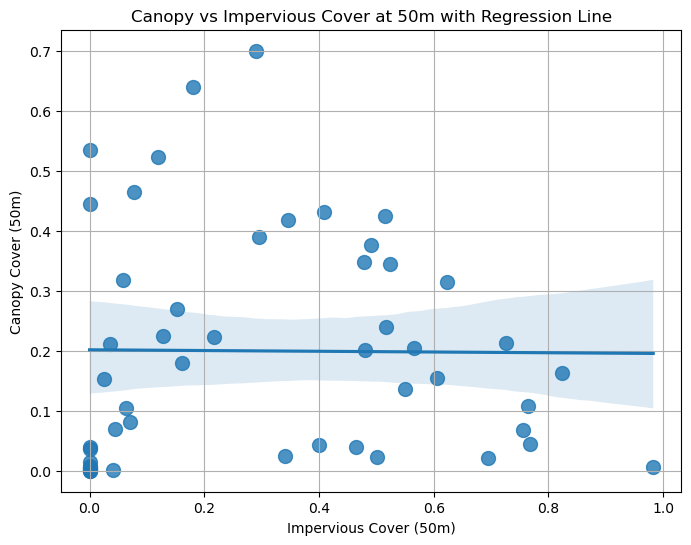

In [24]:
# Canopy vs. impervious cover

# Plotting with seaborn
plt.figure(figsize=(8, 6))
sns.regplot(x='Impervious_percent_cover_50m', y='Canopy_percent_cover_50m', data=variables, scatter_kws={'s': 100})

plt.xlabel('Impervious Cover (50m)')
plt.ylabel('Canopy Cover (50m)')
plt.title('Canopy vs Impervious Cover at 50m with Regression Line')
plt.grid(True)
plt.show()

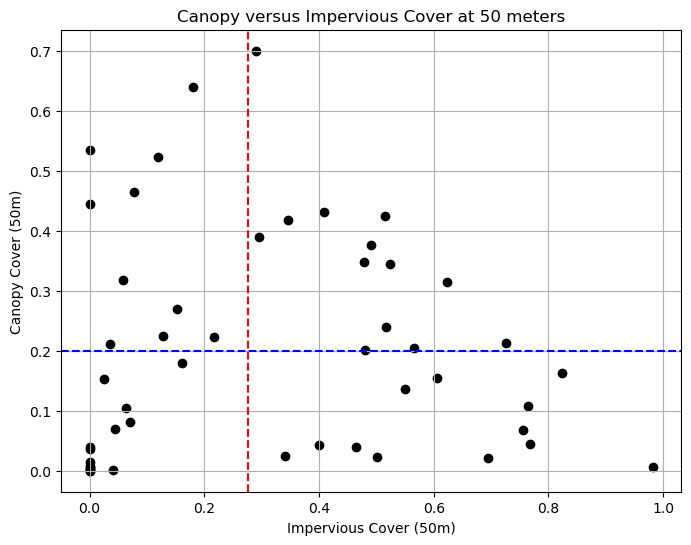

In [32]:
# Calculate averages
canopy_avg = variables['Canopy_percent_cover_50m'].mean()
impervious_avg = variables['Impervious_percent_cover_50m'].mean()

# Plotting without regression line
plt.figure(figsize=(8, 6))
plt.scatter(variables['Impervious_percent_cover_50m'], variables['Canopy_percent_cover_50m'], marker='o', color='black', label='Data Points')

# Plot vertical and horizontal lines at the averages
plt.axvline(x=impervious_avg, color='red', linestyle='--', label=f'Impervious Avg ({impervious_avg:.2f})')
plt.axhline(y=canopy_avg, color='blue', linestyle='--', label=f'Canopy Avg ({canopy_avg:.2f})')

plt.xlabel('Impervious Cover (50m)')
plt.ylabel('Canopy Cover (50m)')
plt.title('Canopy versus Impervious Cover at 50 meters')
#plt.legend()
plt.grid(True)
plt.show()


In [24]:
# Merge variables and temp data
# Add "sensor_" prefix to the ID column in variables DataFrame
variables['ID'] = 'sensor_' + variables['ID'].astype(str)
#Merge the two DataFrames on 'sensor_number' and 'ID'
merged_data = pd.merge(monthly_mean_2023, variables, left_on='sensor_number', right_on='ID')

#merged_data
merged_data

,date_time,temp_f,Time of Day,sensor_number,daily_max_temp,month,daily_mean_temp_,daily_mean_temp_monthly_mean,ID,name,...,Canopy_percent_cover_100m,Canopy_percent_cover_50m,Canopy_percent_cover_30m,Canopy_percent_cover_10m,Canopy_percent_cover_5m,Canopy_percent_cover_1m,zone,zoning_grouped,assoc_tree,notes
0,2023-07-01 00:00:00,53.50,Night,sensor_044a,70.40,7,58.338889,64.689755,sensor_044a,Foothills Community Park irrigated - C,...,0.0183,0.0071,0.012600,0.013200,0.008600,0.010000,Public,Public,NaN,NaN
1,2023-07-01 00:05:00,54.80,Night,sensor_044a,70.40,7,58.338889,64.689755,sensor_044a,Foothills Community Park irrigated - C,...,0.0183,0.0071,0.012600,0.013200,0.008600,0.010000,Public,Public,NaN,NaN
2,2023-07-01 00:10:00,54.40,Night,sensor_044a,70.40,7,58.338889,64.689755,sensor_044a,Foothills Community Park irrigated - C,...,0.0183,0.0071,0.012600,0.013200,0.008600,0.010000,Public,Public,NaN,NaN
3,2023-07-01 00:15:00,54.10,Night,sensor_044a,70.40,7,58.338889,64.689755,sensor_044a,Foothills Community Park irrigated - C,...,0.0183,0.0071,0.012600,0.013200,0.008600,0.010000,Public,Public,NaN,NaN
4,2023-07-01 00:20:00,56.40,Night,sensor_044a,70.40,7,58.338889,64.689755,sensor_044a,Foothills Community Park irrigated - C,...,0.0183,0.0071,0.012600,0.013200,0.008600,0.010000,Public,Public,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540827,2023-07-19 09:35:00,78.87,Day,sensor_043,79.18,7,77.807429,76.449444,sensor_043,BATP - 298,...,0.3783,0.3442,0.332736,0.503483,0.603714,0.660769,Residental low 1,Residental low,NaN,NaN
1540828,2023-07-19 09:40:00,78.87,Day,sensor_043,79.18,7,77.807429,76.449444,sensor_043,BATP - 298,...,0.3783,0.3442,0.332736,0.503483,0.603714,0.660769,Residental low 1,Residental low,NaN,NaN
1540829,2023-07-19 09:45:00,78.87,Day,sensor_043,79.18,7,77.807429,76.449444,sensor_043,BATP - 298,...,0.3783,0.3442,0.332736,0.503483,0.603714,0.660769,Residental low 1,Residental low,NaN,NaN
1540830,2023-07-19 09:50:00,79.18,Day,sensor_043,79.18,7,77.807429,76.449444,sensor_043,BATP - 298,...,0.3783,0.3442,0.332736,0.503483,0.603714,0.660769,Residental low 1,Residental low,NaN,NaN


In [25]:
# #Export csv for gis plotting , keep # out
# columns_to_keep = [
#     'Time of Day',
#     'sensor_number',
#     'month',
#     'latitude',
#     'longitude',
#     'daily_max_temp_monthly_mean', 
#     'ID'
# ]

# merged_data = merged_data[columns_to_keep]
# merged_data
# # Specify the columns for which you want to keep unique combinations
# columns_to_keep_unique = ['sensor_number', 'month', 'latitude', 'longitude', 'daily_max_temp_monthly_mean', 'ID', "Time of Day"]

# # Use drop_duplicates to keep unique combinations of the specified columns
# filtered_data = merged_data[columns_to_keep_unique].drop_duplicates()

# # Print the resulting DataFrame
# filtered_data

# # Filter the DataFrame for a specific month and time of day
# filtered_data = merged_data[(merged_data['month'] == 7) & (merged_data['Time of Day'] == 'Night')]

# filtered_data = filtered_data.drop_duplicates(subset=['ID', 'sensor_number', 'month', 'Time of Day'])

# # Export the filtered DataFrame to a CSV file
# filtered_data.to_csv('filtered_data_max_night.csv', index=False)



In [26]:
unique_sensor_numbers = merged_data['sensor_number'].unique()
print(unique_sensor_numbers)


['sensor_044a' 'sensor_044b' 'sensor_044c' 'sensor_045a' 'sensor_045b'
 'sensor_045c' 'sensor_046a' 'sensor_047a' 'sensor_047b' 'sensor_048a'
 'sensor_048b' 'sensor_001' 'sensor_002' 'sensor_003' 'sensor_004'
 'sensor_005' 'sensor_006' 'sensor_007' 'sensor_008' 'sensor_009'
 'sensor_010' 'sensor_011' 'sensor_012' 'sensor_013' 'sensor_014'
 'sensor_015' 'sensor_016' 'sensor_017' 'sensor_018' 'sensor_019'
 'sensor_020' 'sensor_021' 'sensor_022' 'sensor_023' 'sensor_024'
 'sensor_025' 'sensor_026' 'sensor_027' 'sensor_028' 'sensor_029'
 'sensor_030' 'sensor_031' 'sensor_035' 'sensor_036' 'sensor_037'
 'sensor_038' 'sensor_039' 'sensor_040' 'sensor_042' 'sensor_043']


In [27]:
# List the columns for which you want to drop rows with missing values
columns_to_check = ['Impervious_percent_cover_50m', 'Canopy_percent_cover_50m']  # Replace with your actual column names

# Drop rows with missing values for the specified columns
merged_data.dropna(subset=columns_to_check, inplace=True)
# Create separate DataFrames for day and night observations
day_data = merged_data[merged_data['Time of Day'] == 'Day']
night_data = merged_data[merged_data['Time of Day'] == 'Night']

Month 5, Day Data Shape: (28267, 58), Night Data Shape: (12808, 58)
Month 5, Day Slope: -3.7735516111933847, Night Slope: -1.4024159305948352


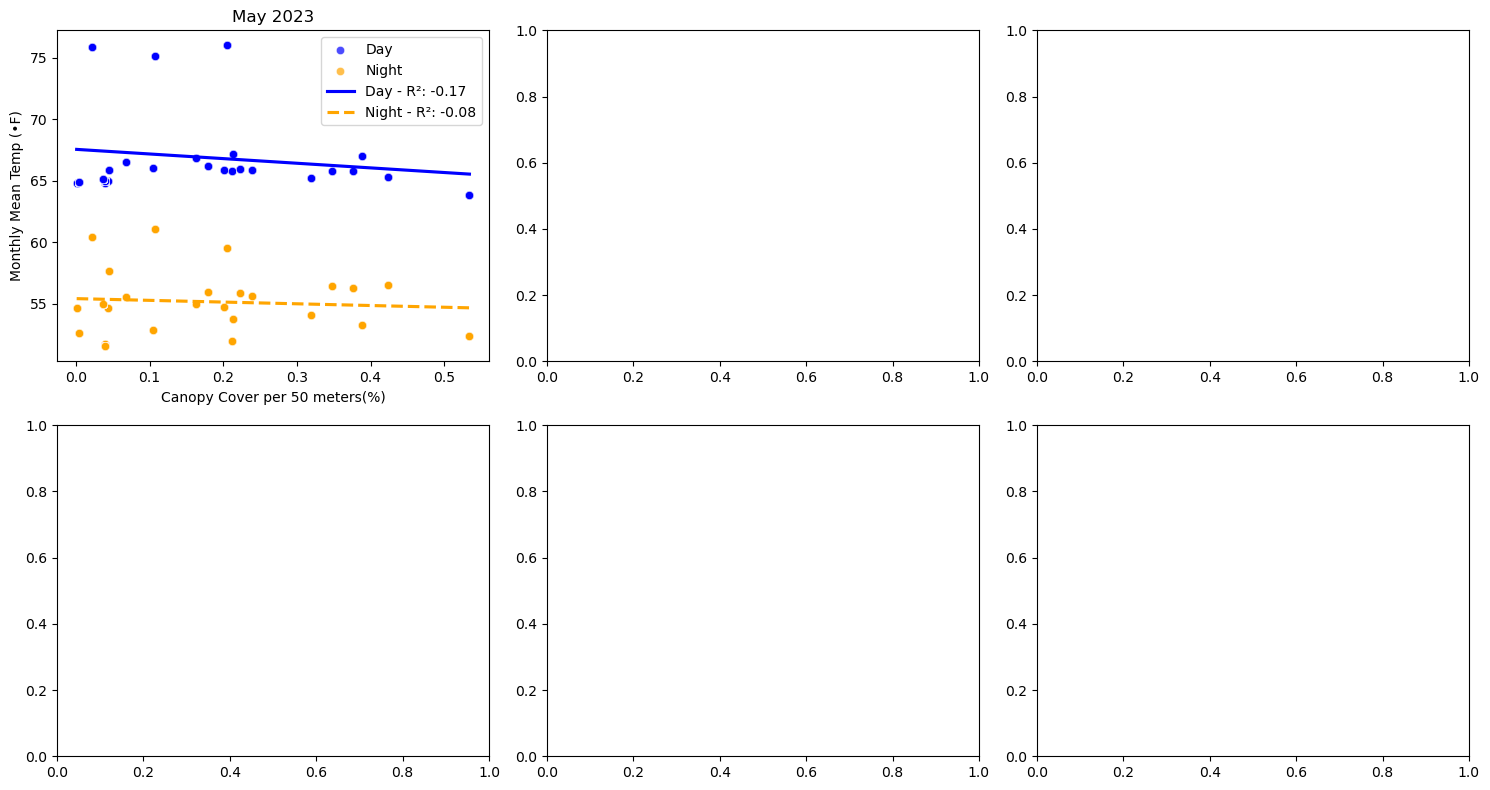

In [50]:
# Create separate DataFrames for day and night observations
day_data = merged_data[merged_data['Time of Day'] == 'Day']
night_data = merged_data[merged_data['Time of Day'] == 'Night']

# Create subplots to display scatter plots by month
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Loop through each month (assuming months are from 5 to 10)
for month in range(5, 6):  # Months 5 to 10
    row = (month - 5) // 3  # Adjust the row index
    col = (month - 5) % 3   # Adjust the column index

    # Subset day and night data for the current month
    day_month_data = day_data[day_data['month'] == month]
    night_month_data = night_data[night_data['month'] == month]

    if not day_month_data.empty and not night_month_data.empty:
        print(f"Month {month}, Day Data Shape: {day_month_data.shape}, Night Data Shape: {night_month_data.shape}")

        # Create a scatter plot of Impervious_percent_cover_50m vs. monthly_avg_mean_temp for day observations
        sns.scatterplot(data=day_month_data, x='Canopy_percent_cover_50m', y='daily_mean_temp_monthly_mean',
                        ax=axes[row, col], color='blue', label='Day', alpha=0.7)

        # Create a scatter plot of Impervious_percent_cover_50m vs. monthly_avg_mean_temp for night observations
        sns.scatterplot(data=night_month_data, x='Canopy_percent_cover_50m', y='daily_mean_temp_monthly_mean',
                        ax=axes[row, col], color='orange', label='Night', alpha=0.7)

        # Calculate and plot linear regression lines using Seaborn's regplot
        day_slope, day_intercept, day_r_value, _, _ = linregress(day_month_data['Canopy_percent_cover_50m'], day_month_data['daily_mean_temp_monthly_mean'])
        night_slope, night_intercept, night_r_value, _, _ = linregress(night_month_data['Canopy_percent_cover_50m'], night_month_data['daily_mean_temp_monthly_mean'])

        print(f"Month {month}, Day Slope: {day_slope}, Night Slope: {night_slope}")

        sns.regplot(x='Canopy_percent_cover_50m', y='daily_mean_temp_monthly_mean', data=day_month_data, ci=None, scatter=False,
                    ax=axes[row, col], label=f'Day - R²: {day_r_value:.2f}', line_kws={'linestyle': '-', 'color': 'blue'})

        sns.regplot(x='Canopy_percent_cover_50m', y='daily_mean_temp_monthly_mean', data=night_month_data, ci=None, scatter=False,
                    ax=axes[row, col], label=f'Night - R²: {night_r_value:.2f}', line_kws={'linestyle': '--', 'color': 'orange'})

        axes[row, col].set_title(f'{calendar.month_abbr[month]} 2023')
        axes[row, col].set_xlabel('Canopy Cover per 50 meters(%)')
        axes[row, col].set_ylabel('Monthly Mean Temp (•F)')
        axes[row, col].legend()

# Adjust subplot layout
plt.tight_layout()
plt.show()


/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_26568/1358411963.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data[x_value] *= 100


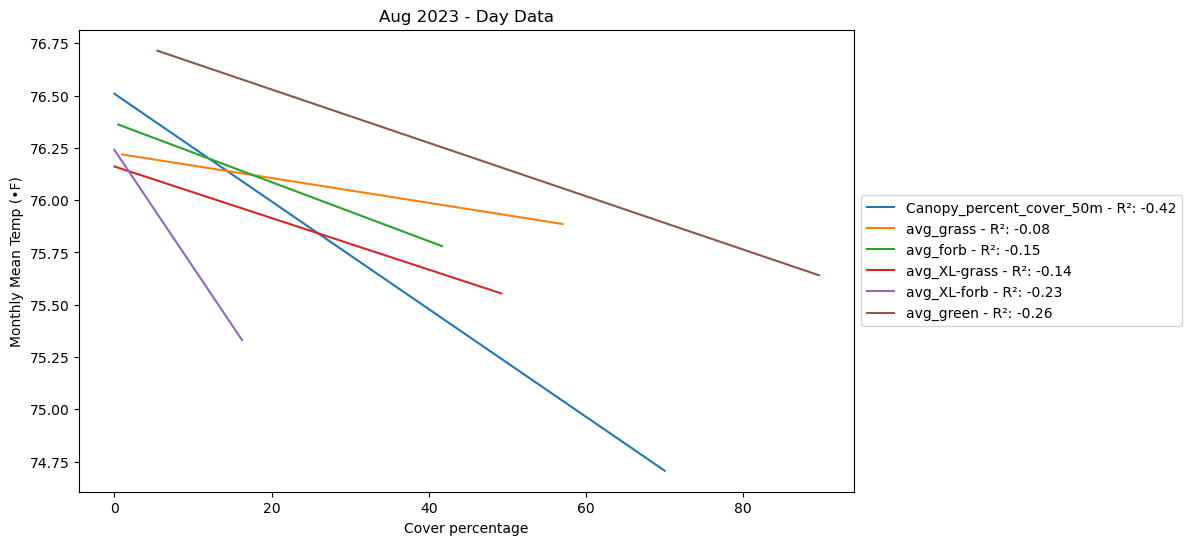

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import calendar
import numpy as np
import matplotlib.ticker as mtick

# Define the month you want to plot
month_to_plot = 8  # Change this to the desired month

# Subset the day data for the specified month
day_month_data = day_data[day_data['month'] == month_to_plot]

# Define the x-values you want to plot
x_values = ['Canopy_percent_cover_50m', 'avg_grass', 'avg_forb', 'avg_XL-grass', 'avg_XL-forb', 'avg_green']

# Create a plot for the specified month
plt.figure(figsize=(10, 6))

# Iterate through each x-value
for x_value in x_values:
    # Remove missing or invalid values (e.g., nan) from the data
    valid_data = day_month_data.dropna(subset=[x_value, 'daily_mean_temp_monthly_mean'])

    if not valid_data.empty:
        # Convert 'Canopy_percent_cover_50m' to a percentage if it's the x-value
        if x_value == 'Canopy_percent_cover_50m':
            valid_data[x_value] *= 100

        # Calculate linear regression
        slope, intercept, r_value, _, _ = linregress(valid_data[x_value], valid_data['daily_mean_temp_monthly_mean'])

        # Create a line plot for the current x-value
        x_sorted = np.sort(valid_data[x_value])
        y_pred = intercept + slope * x_sorted

        # Display the x-value label
        plt.plot(x_sorted, y_pred, label=f"{x_value} - R²: {r_value:.2f}")

# Set plot properties
plt.title(f'{calendar.month_abbr[month_to_plot]} 2023 - Day Data')
plt.xlabel('Cover percentage')
plt.ylabel('Monthly Mean Temp (•F)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Format y-axis tick labels as percentages

plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming your DataFrame is named 'temperature_data' and contains columns: 'latitude', 'longitude', 'temperature', 'time'
# 'time' should be in a datetime format

# Create a meshgrid from latitude and longitude
x = merged_data['longitude']
y = merged_data['latitude']
X, Y = np.meshgrid(x, y)

# Reshape temperature values to match the shape of the meshgrid
Z = merged_data['daily_mean_temp_monthly_mean'].values.reshape(X.shape)

# Create a 3D axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(X, Y, Z, cmap='viridis')

# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Temperature (°C)')
ax.set_title('3D Surface Plot of Temperature Over Time and Space')

# Add color bar
fig.colorbar(surface, ax=ax, label='Temperature (°C)')

# Show the plot
plt.show()


NameError: name 'merged_data' is not defined

In [ ]:
# Function with sensors labeled 

def plot_temperature_vs_cover(merged_data, temperature_type, cover_type):
    # Create separate DataFrames for day and night observations
    day_data = merged_data[merged_data['Time of Day'] == 'Day']
    night_data = merged_data[merged_data['Time of Day'] == 'Night']

    # Create subplots to display scatter plots by month
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

    # Loop through each month (assuming months are from 5 to 10)
    for month in range(5, 11):  # Months 5 to 10
        row = (month - 5) // 3  # Adjust the row index
        col = (month - 5) % 3   # Adjust the column index

        # Subset day and night data for the current month
        day_month_data = day_data[day_data['month'] == month]
        night_month_data = night_data[night_data['month'] == month]

        if not day_month_data.empty and not night_month_data.empty:
            print(f"Month {month}, Day Data Shape: {day_month_data.shape}, Night Data Shape: {night_month_data.shape}")

            # Create a scatter plot based on the selected temperature and cover type
            sns.scatterplot(data=day_month_data, x=cover_type, y=temperature_type, ax=axes[row, col], color='blue', label='Day', alpha=0.7)
            sns.scatterplot(data=night_month_data, x=cover_type, y=temperature_type, ax=axes[row, col], color='orange', label='Night', alpha=0.7)

            # Label data points with sensor names
            for _, row_data in day_month_data.iterrows():
                axes[row, col].text(row_data[cover_type], row_data[temperature_type], row_data['sensor_number'], horizontalalignment='left', size='medium', color='black', weight='semibold')

            for _, row_data in night_month_data.iterrows():
                axes[row, col].text(row_data[cover_type], row_data[temperature_type], row_data['sensor_number'], horizontalalignment='left', size='medium', color='black', weight='semibold')

            # Calculate and plot linear regression lines using Seaborn's regplot
            day_slope, day_intercept, day_r_value, _, _ = linregress(day_month_data[cover_type], day_month_data[temperature_type])
            night_slope, night_intercept, night_r_value, _, _ = linregress(night_month_data[cover_type], night_month_data[temperature_type])

            print(f"Month {month}, Day Slope: {day_slope}, Night Slope: {night_slope}")

            sns.regplot(x=cover_type, y=temperature_type, data=day_month_data, ci=None, scatter=False,
                        ax=axes[row, col], label=f'Day - R²: {day_r_value:.2f}', line_kws={'linestyle': '-', 'color': 'blue'})
            sns.regplot(x=cover_type, y=temperature_type, data=night_month_data, ci=None, scatter=False,
                        ax=axes[row, col], label=f'Night - R²: {night_r_value:.2f}', line_kws={'linestyle': '--', 'color': 'orange'})

            axes[row, col].set_title(f'{calendar.month_abbr[month]} 2023')
            axes[row, col].set_xlabel(f'{cover_type} (%)')
            axes[row, col].set_ylabel(f'{temperature_type} (°F)')
            axes[row, col].legend()

    # Adjust subplot layout
    plt.tight_layout()
    plt.show()

# Example usage:
plot_temperature_vs_cover(merged_data, 'daily_max_temp_monthly_mean', 'Impervious_percent_cover_50m')


In [ ]:
# Plots per ground veg measurements 
# import matplotlib
# matplotlib.use('Agg')  # Change the backend
# Custom labels for column names
column_labels = {
    'avg_grass': 'Grass',
    'avg_forb': 'Forb',
    'avg_shrub': 'Shrub',
    'avg_a-c-r': 'Asphat, concrete, or rock',
    'avg_bare-ground': 'Bare Ground',
    'avg_water': 'Water',
    'avg_XL-grass': 'Grass over 0.5 meters',
    'avg_XL-forb': 'Forbs over 0.5 meters',
    'avg_XL-shrub': 'Shrubs 0.5 meters',
    'avg_green' : 'Grass, forbs, and shrubs cover'
}

# Plot veg. data 
def plot_temps_by_cover(merged_data, column_name, month):
    plt.figure(figsize=(12, 6))
    sns.set_style('whitegrid')
    
    # Filter data for the specific month
    month_data = merged_data[merged_data['month'] == month]
    
    # Combine 'Time of Day' and 'sensor_number' to create a unique hue identifier
    month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)
    
    # Define colors for day and night points
    day_color = 'pink'
    night_color = 'green'
    
    # Plot the data using Seaborn
    sns.scatterplot(data=month_data, x=column_name, y='daily_mean_temp_monthly_mean', hue='Time of Day',
                    palette={'Day': day_color, 'Night': night_color})
    
    # Calculate and plot linear regression lines using Seaborn's regplot
    day_data = month_data[month_data['Time of Day'] == 'Day']
    night_data = month_data[month_data['Time of Day'] == 'Night']
    
    day_slope, day_intercept, day_r_value, _, _ = linregress(day_data[column_name], day_data['daily_mean_temp_monthly_mean'])
    night_slope, night_intercept, night_r_value, _, _ = linregress(night_data[column_name], night_data['daily_mean_temp_monthly_mean'])
    
    sns.regplot(data=day_data, x=column_name, y='daily_mean_temp_monthly_mean', ci=None, scatter=False, label=f'Day - R²: {day_r_value:.2f}', line_kws={'linestyle': '-', 'color': day_color})
    sns.regplot(data=night_data, x=column_name, y='daily_mean_temp_monthly_mean', ci=None, scatter=False, label=f'Night - R²: {night_r_value:.2f}', line_kws={'linestyle': '--', 'color': night_color})
    
    # Get the custom label for the column or use the column name
    cover_type_label = column_labels.get(column_name, column_name.replace('%_avg_cover_', '').replace('_', ' ').capitalize())
    
    plt.xlabel(f'Percentage Average {cover_type_label}')
    plt.ylabel('Daily Mean, Monthly Average Temperature (°F)')
    plt.title(f'Monthly Temperatures vs. Percentage Average {cover_type_label} in 50-meters - {calendar.month_name[month]} 2023')
    
    # Add linear regression equations in the legend
    legend = plt.legend(title='', loc='upper left')
    legend.texts[0].set_text(f'Day y = {day_slope:.2f}x + {day_intercept:.2f}')
    legend.texts[1].set_text(f'Night y = {night_slope:.2f}x + {night_intercept:.2f}')
    
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.xlim(month_data[column_name].min() - 5, month_data[column_name].max() + 5)
    plt.xlim(0, 100)  # Set x-axis limits to 0-100
    plt.ylim(50, 100)  # Set y-axis limits to 50-110
    plt.show()

# List of months for which you want to create plots
months_to_plot = [5, 6, 7]  # Adjust this list as needed

# List of column names to plot
columns_to_plot = [
    'avg_grass',
    'avg_forb',
    'avg_shrub',
    'avg_a-c-r',
    'avg_bare-ground',
    'avg_water',
    'avg_XL-grass',
    'avg_XL-forb',
    'avg_XL-shrub',
    'avg_green'
]

# ... (previous code)

for column_name in columns_to_plot:
    for month in months_to_plot:
        plot_temps_by_cover(merged_data, column_name, month)
        plt.savefig(f'./{column_name}_{calendar.month_abbr[month]}.png', bbox_inches='tight')  # Save in the current directory
        #plt.close()  # Close the current figure to avoid overlap in subsequent loops

In [ ]:
# Canopy and Impervious on the same plot 

# Assuming you have separate DataFrames for day and night observations
day_data = merged_data[merged_data['Time of Day'] == 'Day']
night_data = merged_data[merged_data['Time of Day'] == 'Night']

# Create subplots to display scatter plots by month
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Initialize an empty list to collect legend handles and labels
legend_handles = []

# Loop through each month (assuming months are from 5 to 10)
for month in range(5, 11):  # Months 5 to 10
    row = (month - 5) // 3  # Adjust the row index
    col = (month - 5) % 3   # Adjust the column index

    # Subset day and night data for the current month
    day_month_data = day_data[day_data['month'] == month]
    night_month_data = night_data[night_data['month'] == month]

    if not day_month_data.empty and not night_month_data.empty:
        print(f"Month {month}, Day Data Shape: {day_month_data.shape}, Night Data Shape: {night_month_data.shape}")

        # Create a scatter plot of Impervious_percent_cover_50m vs. daily_mean_temp_monthly_mean for day observations
        sns.scatterplot(data=day_month_data, x='Impervious_percent_cover_50m', y='daily_mean_temp_monthly_mean',
                        ax=axes[row, col], color='lightblue', label='Day - Impervious', alpha=0.7)

        sns.scatterplot(data=day_month_data, x='Canopy_percent_cover_50m', y='daily_mean_temp_monthly_mean',
                        ax=axes[row, col], color='darkgreen', label='Day - Canopy', alpha=0.7)

        # Create a scatter plot of Impervious_percent_cover_50m vs. daily_mean_temp_monthly_mean for night observations
        sns.scatterplot(data=night_month_data, x='Impervious_percent_cover_50m', y='daily_mean_temp_monthly_mean',
                        ax=axes[row, col], color='lightblue', label='Night - Impervious', alpha=0.7)

        sns.scatterplot(data=night_month_data, x='Canopy_percent_cover_50m', y='daily_mean_temp_monthly_mean',
                        ax=axes[row, col], color='darkgreen', label='Night - Canopy', alpha=0.7)

        # Calculate and plot linear regression lines using Seaborn's regplot for Impervious cover
        day_slope_imp, day_intercept_imp, day_r_value_imp, _, _ = linregress(day_month_data['Impervious_percent_cover_50m'], day_month_data['daily_mean_temp_monthly_mean'])
        night_slope_imp, night_intercept_imp, night_r_value_imp, _, _ = linregress(night_month_data['Impervious_percent_cover_50m'], night_month_data['daily_mean_temp_monthly_mean'])

        # Calculate and plot linear regression lines using Seaborn's regplot for Canopy cover
        day_slope_canopy, day_intercept_canopy, day_r_value_canopy, _, _ = linregress(day_month_data['Canopy_percent_cover_50m'], day_month_data['daily_mean_temp_monthly_mean'])
        night_slope_canopy, night_intercept_canopy, night_r_value_canopy, _, _ = linregress(night_month_data['Canopy_percent_cover_50m'], night_month_data['daily_mean_temp_monthly_mean'])

        print(f"Month {month}, Day Impervious Slope: {day_slope_imp}, Night Impervious Slope: {night_slope_imp}")
        print(f"Month {month}, Day Canopy Slope: {day_slope_canopy}, Night Canopy Slope: {night_slope_canopy}")

        sns.regplot(x='Impervious_percent_cover_50m', y='daily_mean_temp_monthly_mean', data=day_month_data, ci=None, scatter=False,
                    ax=axes[row, col], line_kws={'linestyle': '-', 'color': 'lightblue'})

        sns.regplot(x='Impervious_percent_cover_50m', y='daily_mean_temp_monthly_mean', data=night_month_data, ci=None, scatter=False,
                    ax=axes[row, col], line_kws={'linestyle': '--', 'color': 'lightblue'})

        sns.regplot(x='Canopy_percent_cover_50m', y='daily_mean_temp_monthly_mean', data=day_month_data, ci=None, scatter=False,
                    ax=axes[row, col], line_kws={'linestyle': '-', 'color': 'darkgreen'})

        sns.regplot(x='Canopy_percent_cover_50m', y='daily_mean_temp_monthly_mean', data=night_month_data, ci=None, scatter=False,
                    ax=axes[row, col], line_kws={'linestyle': '--', 'color': 'darkgreen'})

        # Calculate R-squared values and add them to the plot
        day_r_squared_imp = day_r_value_imp ** 2
        night_r_squared_imp = night_r_value_imp ** 2
        day_r_squared_canopy = day_r_value_canopy ** 2
        night_r_squared_canopy = night_r_value_canopy ** 2

        # Add R-squared values to the plots
        axes[row, col].text(0.5, 0.05, f'R² Day Impervious: {day_r_squared_imp:.2f}', transform=axes[row, col].transAxes)
        axes[row, col].text(0.5, 0.01, f'R² Night Impervious: {night_r_squared_imp:.2f}', transform=axes[row, col].transAxes)
        axes[row, col].text(0.5, 0.10, f'R² Day Canopy: {day_r_squared_canopy:.2f}', transform=axes[row, col].transAxes)
        axes[row, col].text(0.5, 0.14, f'R² Night Canopy: {night_r_squared_canopy:.2f}', transform=axes[row, col].transAxes)

        axes[row, col].set_title(f'{calendar.month_abbr[month]} 2023')
        axes[row, col].set_xlabel('Percent Cover (%)')
        axes[row, col].set_ylabel('Monthly Avg Mean Temp (°F)')

        # Collect legend handles and labels
        handles, labels = axes[row, col].get_legend_handles_labels()
        legend_handles.extend(handles)

# Add the legend outside of the plots
fig.legend(handles=legend_handles, labels=['Day - Impervious', 'Day - Canopy', 'Night - Impervious', 'Night - Canopy', 'R²'], loc='upper right', bbox_to_anchor=(1.1, 1.0))

# Show the plot
plt.show()

In [27]:
# Anomolies 
# Take the mean 
# Calculate the monthly mean for all sensors, all months, and all times of day
merged_data['all_sensors_monthly_mean'] = merged_data.groupby(['month', 'Time of Day'])['daily_mean_temp_monthly_mean'].transform('mean')

# Calculate the temperature anomaly as the difference between all_sensors_monthly_mean and daily_mean_temp_monthly_mean for each sensor
merged_data['temperature_anomaly'] = merged_data['daily_mean_temp_monthly_mean'] - merged_data['all_sensors_monthly_mean']

# Create a new DataFrame containing only the columns you need
anomaly_data = merged_data[['ID', 'month', 'Time of Day', 'daily_mean_temp_monthly_mean', 'all_sensors_monthly_mean', 'temperature_anomaly']]

# Optionally, you can reset the index if needed
anomaly_data.reset_index(drop=True, inplace=True)
anomaly_data

,ID,month,Time of Day,daily_mean_temp_monthly_mean,all_sensors_monthly_mean,temperature_anomaly
0,sensor_044a,7,Night,64.689755,65.168199,-0.478444
1,sensor_044a,7,Night,64.689755,65.168199,-0.478444
2,sensor_044a,7,Night,64.689755,65.168199,-0.478444
3,sensor_044a,7,Night,64.689755,65.168199,-0.478444
4,sensor_044a,7,Night,64.689755,65.168199,-0.478444
...,...,...,...,...,...,...
1446684,sensor_043,7,Day,76.449444,77.920725,-1.471281
1446685,sensor_043,7,Day,76.449444,77.920725,-1.471281
1446686,sensor_043,7,Day,76.449444,77.920725,-1.471281
1446687,sensor_043,7,Day,76.449444,77.920725,-1.471281


In [28]:
# Maybe export anam data to csv and work in it somewhere else
print(anomaly_data['ID'].unique())

['sensor_044a' 'sensor_044b' 'sensor_044c' 'sensor_045a' 'sensor_045b'
 'sensor_045c' 'sensor_046a' 'sensor_047a' 'sensor_047b' 'sensor_048a'
 'sensor_048b' 'sensor_001' 'sensor_002' 'sensor_003' 'sensor_004'
 'sensor_005' 'sensor_006' 'sensor_007' 'sensor_008' 'sensor_009'
 'sensor_010' 'sensor_011' 'sensor_012' 'sensor_013' 'sensor_014'
 'sensor_015' 'sensor_016' 'sensor_017' 'sensor_018' 'sensor_019'
 'sensor_020' 'sensor_021' 'sensor_022' 'sensor_023' 'sensor_024'
 'sensor_025' 'sensor_026' 'sensor_027' 'sensor_028' 'sensor_029'
 'sensor_030' 'sensor_031' 'sensor_035' 'sensor_039' 'sensor_040'
 'sensor_043']


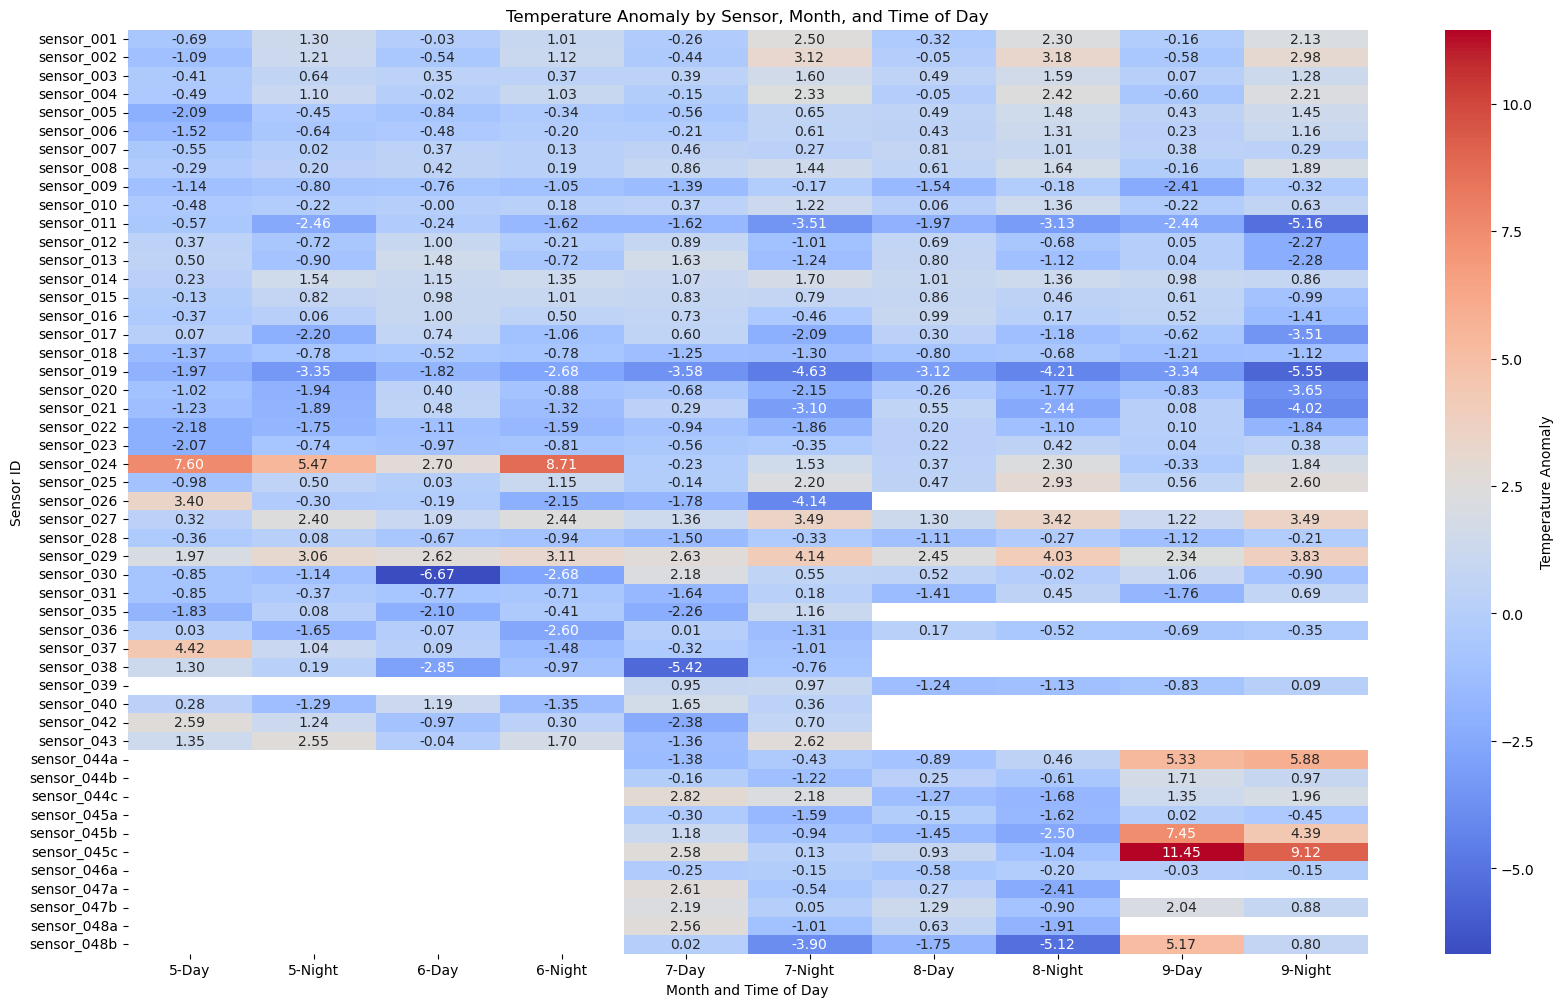

In [25]:
# Anomoly plot 
plt.figure(figsize=(20, 12))
heatmap = sns.heatmap(anomaly_data.pivot_table(values='temperature_anomaly', index='ID', columns=['month', 'Time of Day']), cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Temperature Anomaly'})
plt.xlabel('Month and Time of Day')
plt.ylabel('Sensor ID')
plt.title('Temperature Anomaly by Sensor, Month, and Time of Day')
plt.yticks(rotation=0)  # Rotate the y-axis labels for better readability
plt.show()


In [ ]:
# Canopy on one axis, impervious on the other 
# Custom colormap
custom_colormap = plt.cm.get_cmap('Spectral').reversed()

# Define the text offset for sensor numbers
text_offset = 0.001

# Define the temperature range for the color mapping
temperature_min = merged_data['daily_mean_temp_monthly_mean'].min()
temperature_max = merged_data['daily_mean_temp_monthly_mean'].max()

months = merged_data['month'].unique()

for month in months:
    month_name = calendar.month_name[month]  # Get the month name
    month_data = merged_data[merged_data['month'] == month]

    fig, (ax_day, ax_night) = plt.subplots(1, 2, figsize=(18, 8))

    scatter_day = ax_day.scatter(month_data[month_data['Time of Day'] == 'Day']['Impervious_percent_cover_50m'],
                                  month_data[month_data['Time of Day'] == 'Day']['Canopy_percent_cover_50m'],
                                  c=month_data[month_data['Time of Day'] == 'Day']['daily_mean_temp_monthly_mean'],
                                  cmap=custom_colormap, alpha=0.7, s=150, vmin=temperature_min, vmax=temperature_max)

    scatter_night = ax_night.scatter(month_data[month_data['Time of Day'] == 'Night']['Impervious_percent_cover_50m'],
                                      month_data[month_data['Time of Day'] == 'Night']['Canopy_percent_cover_50m'],
                                      c=month_data[month_data['Time of Day'] == 'Night']['daily_mean_temp_monthly_mean'],
                                      cmap=custom_colormap, alpha=0.7, s=150, vmin=temperature_min, vmax=temperature_max)

    cbar_day = plt.colorbar(scatter_day, ax=ax_day)
    cbar_day.set_label('Daily mean, monthly mean air temperature (F)')

    cbar_night = plt.colorbar(scatter_night, ax=ax_night)
    cbar_night.set_label('Daily mean, monthly mean air temperature (F)')

    for _, row in month_data.iterrows():
        if not row[['Impervious_percent_cover_50m', 'Canopy_percent_cover_50m', 'sensor_number']].isnull().any():
            if row['Time of Day'] == 'Day':
                ax_day.text(row['Impervious_percent_cover_50m'] + text_offset, 
                            row['Canopy_percent_cover_50m'] + text_offset, 
                            str(row['sensor_number']),
                            fontsize=8, ha='center', va='center')
            elif row['Time of Day'] == 'Night':
                ax_night.text(row['Impervious_percent_cover_50m'] + text_offset, 
                              row['Canopy_percent_cover_50m'] + text_offset, 
                              str(row['sensor_number']),
                              fontsize=8, ha='center', va='center')

    ax_day.set_title(f"{month_name} - Day 2023")  # Use the month name
    ax_night.set_title(f"{month_name} - Night 2023")  # Use the month name

    ax_day.set_xlabel('Impervious Cover per 50 meters (%)')
    ax_day.set_ylabel('Canopy cover per 50 meters (%)')

    ax_night.set_xlabel('Impervious Cover per 50 meteres (%)')
    ax_night.set_ylabel('Canopy cover per 50 meters (%)')

    plt.savefig(f'{month_name}_plots.png', bbox_inches='tight')  # Save the figure as PNG
    #plt.close()  # Close the current figure to avoid overlap in subsequent loops
    #plt.show()

In [ ]:
# Plot by zoning class

# Assuming you have a 'merged_data' DataFrame

# Group by 'zone' and 'month', and calculate the average of 'daily_mean_temp_monthly_mean'
grouped_data = merged_data.groupby(['zoning_grouped', 'month'])['daily_mean_temp_monthly_mean'].mean().reset_index()

# Create a pivot table to reshape the data for plotting
pivot_data = grouped_data.pivot(index='month', columns='zoning_grouped', values='daily_mean_temp_monthly_mean')

# Create a plot
plt.figure(figsize=(10, 6))

# Define a list of colors and line styles
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
line_styles = ['-', '--', '-.', ':']

# Iterate through unique zones and plot the data with different colors and line styles
for i, zone in enumerate(pivot_data.columns):
    color = colors[i % len(colors)]
    line_style = line_styles[i % len(line_styles)]
    plt.plot(pivot_data.index, pivot_data[zone], label=f'Zone {zone}', color=color, linestyle=line_style)

# Set x-axis ticks for only the months 5, 6, and 7
plt.xticks([5, 6, 7])

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Monthly Mean')
plt.title('Monthly Mean by Zoning class')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
# Check unique 'ID' numbers
unique_ids = merged_data['ID'].unique()
print("Unique ID numbers:", unique_ids)

# Check unique zoning groups
unique_zoning_groups = merged_data['zoning_grouped'].unique()
print("Unique zoning groups:", unique_zoning_groups)


In [ ]:
# Define a dictionary to map old zoning classes to new ones
# Remove leading and trailing spaces from the 'Zoning_Class' column
merged_data['Zoning_Class'] = merged_data['zoning_grouped'].str.strip()

zoning_class_mapping = {
    'Public ': 'Public',
    'Public' : 'Public',
    ' Public' : 'Public',
    'Residental low': 'Residential Low',
    'Residental high': 'Residential High',
    'Residental medium': 'Residential Medium',
    'Residental estate': 'Residential Estate',
    'Business': 'Business',
    'Agricultural': 'Agricultural',
    'Industrial': 'Industrial',
    'Residental mixed ': 'Residential Mixed',
}

# Apply the mapping to the 'Zoning_Class' column
merged_data['zoning_grouped'] = merged_data['zoning_grouped'].replace(zoning_class_mapping)


In [ ]:
# Filter the data for 'Day'
day_data = merged_data[merged_data['Time of Day'] == 'Day']

# Group by 'zoning_grouped' and 'month', and calculate the average of 'daily_mean_temp_monthly_mean'
grouped_data_day = day_data.groupby(['zoning_grouped', 'month'])['daily_mean_temp_monthly_mean'].mean().reset_index()

# Create a pivot table to reshape the data for plotting
pivot_data_day = grouped_data_day.pivot(index='month', columns='zoning_grouped', values='daily_mean_temp_monthly_mean')

# Get the count of unique sensors in each zoning class for 'Day'
count_data_day = day_data.groupby(['zoning_grouped'])['ID'].nunique().reset_index()

# Create a plot for 'Day'
plt.figure(figsize=(10, 6))

# Define a list of colors and line styles
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
line_styles = ['-', '--', '-.', ':']

# Initialize a legend labels list
legend_labels_day = []

# Iterate through unique zones and plot the data with different colors and line styles for 'Day'
for i, zone in enumerate(pivot_data_day.columns):
    color = colors[i % len(colors)]
    line_style = line_styles[i % len(line_styles)]

    # Get the counts for the current zone for 'Day'
    counts = count_data_day[count_data_day['zoning_grouped'] == zone]

    # Create a label for the legend with the zone name and count for 'Day'
    label = f'Zone {zone} (Count: {counts["ID"].values[0]})'
    legend_labels_day.append(label)

    # Plot the data for 'Day'
    plt.plot(pivot_data_day.index, pivot_data_day[zone], label=label, color=color, linestyle=line_style)

# Set x-axis ticks for only the months 5, 6, 7
plt.xticks([5, 6, 7, 8, 9])

# Set plot labels and title for 'Day'
plt.xlabel('Month')
plt.ylabel('Monthly Mean for Day')
plt.title('Monthly Mean by Zoning class (Day)')

# Add a legend with labels including count information for 'Day'
plt.legend(legend_labels_day)

# Show the plot for 'Day'
plt.grid(True)
plt.show()




In [ ]:
# Filter the data for the 'Residential Low' zoning class
residential_low_data = merged_data[merged_data['zoning_grouped'] == 'Residential Low']

# Create separate plots for 'Day' and 'Night'
for time_of_day in ['Day', 'Night']:
    time_of_day_data = residential_low_data[residential_low_data['Time of Day'] == time_of_day]
    
    # Create a scatter plot
    plt.figure(figsize=(10, 6))

    # Iterate through unique sensors for the current time of day
    for sensor_id in time_of_day_data['ID'].unique():
        sensor_data = time_of_day_data[time_of_day_data['ID'] == sensor_id]
        
        # Sort the data by 'month' for line connection
        sensor_data = sensor_data.sort_values(by='month')
        
        # Plot the data for the current sensor as a line plot
        plt.plot(sensor_data['month'], sensor_data['daily_mean_temp_monthly_mean'], label=f'Sensor ID {sensor_id}', marker='o')

    # Set x-axis ticks for the months you want to display
    plt.xticks([6, 7, 8])

    # Set plot labels and title
    plt.xlabel('Month')
    plt.ylabel('Monthly Mean Temperature (°F)')
    plt.title(f'Monthly Mean Temperature by Sensor in Residential Low Zoning Class ({time_of_day})')

    # Add a legend with labels including sensor IDs, and move it to the right
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Show the plot
    plt.grid(True)


In [ ]:
# Plot for specific zoning class - specific sensors 

# Filter the data for the 'Residential Low' zoning class
residential_low_data = merged_data[merged_data['zoning_grouped'] == 'Residential Low']


# Define the sensor IDs you want to include
selected_sensor_ids = ['sensor_002', 'sensor_008', 'sensor_010', 'sensor_013', 'sensor_042']  # Replace with the desired sensor IDs

# Create separate plots for 'Day' and 'Night'
for time_of_day in ['Day', 'Night']:
    time_of_day_data = residential_low_data[(residential_low_data['Time of Day'] == time_of_day) & (residential_low_data['ID'].isin(selected_sensor_ids))]
    
    # Create a scatter plot
    plt.figure(figsize=(10, 6))

    # Iterate through selected sensors for the current time of day
    for sensor_id in selected_sensor_ids:
        sensor_data = time_of_day_data[time_of_day_data['ID'] == sensor_id]
        
        # Sort the data by 'month' for line connection
        sensor_data = sensor_data.sort_values(by='month')
        
        # Plot the data for the current sensor as a line plot
        plt.plot(sensor_data['month'], sensor_data['daily_mean_temp_monthly_mean'], label=f'Sensor ID {sensor_id}', marker='o')

    # Set x-axis ticks for the months you want to display
    plt.xticks([6, 7, 8])

    # Set plot labels and title
    plt.xlabel('Month')
    plt.ylabel('Monthly Mean Temperature (°F)')
    plt.title(f'Monthly Mean Temperature by Sensor in Residential Low Zoning Class ({time_of_day})')

    # Add a legend with labels including sensor IDs, and move it to the right
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Show the plot
    plt.grid(True)
    plt.show()


Month 5, Day Data Shape: (102433, 58), Night Data Shape: (61392, 58)
Month 5, Day Slope: 1.416168880329986, Night Slope: 3.1770182755976775
Month 5, Day Canopy Slope: nan, Night Canopy Slope: nan
Month 6, Day Data Shape: (200729, 58), Night Data Shape: (120420, 58)
Month 6, Day Slope: 2.6737801850084577, Night Slope: 4.3169150456253504
Month 6, Day Canopy Slope: nan, Night Canopy Slope: nan
Month 7, Day Data Shape: (250723, 58), Night Data Shape: (150792, 58)
Month 7, Day Slope: 1.74393628377843, Night Slope: 3.6597839105142747
Month 7, Day Canopy Slope: nan, Night Canopy Slope: nan
Month 8, Day Data Shape: (229149, 58), Night Data Shape: (137497, 58)
Month 8, Day Slope: 1.8991888684500837, Night Slope: 3.7567411137007145
Month 8, Day Canopy Slope: nan, Night Canopy Slope: nan
Month 9, Day Data Shape: (178450, 58), Night Data Shape: (109247, 58)
Month 9, Day Slope: 1.0984825746304558, Night Slope: 2.6912168795077296
Month 9, Day Canopy Slope: nan, Night Canopy Slope: nan


/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_33544/2463988208.py:59: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


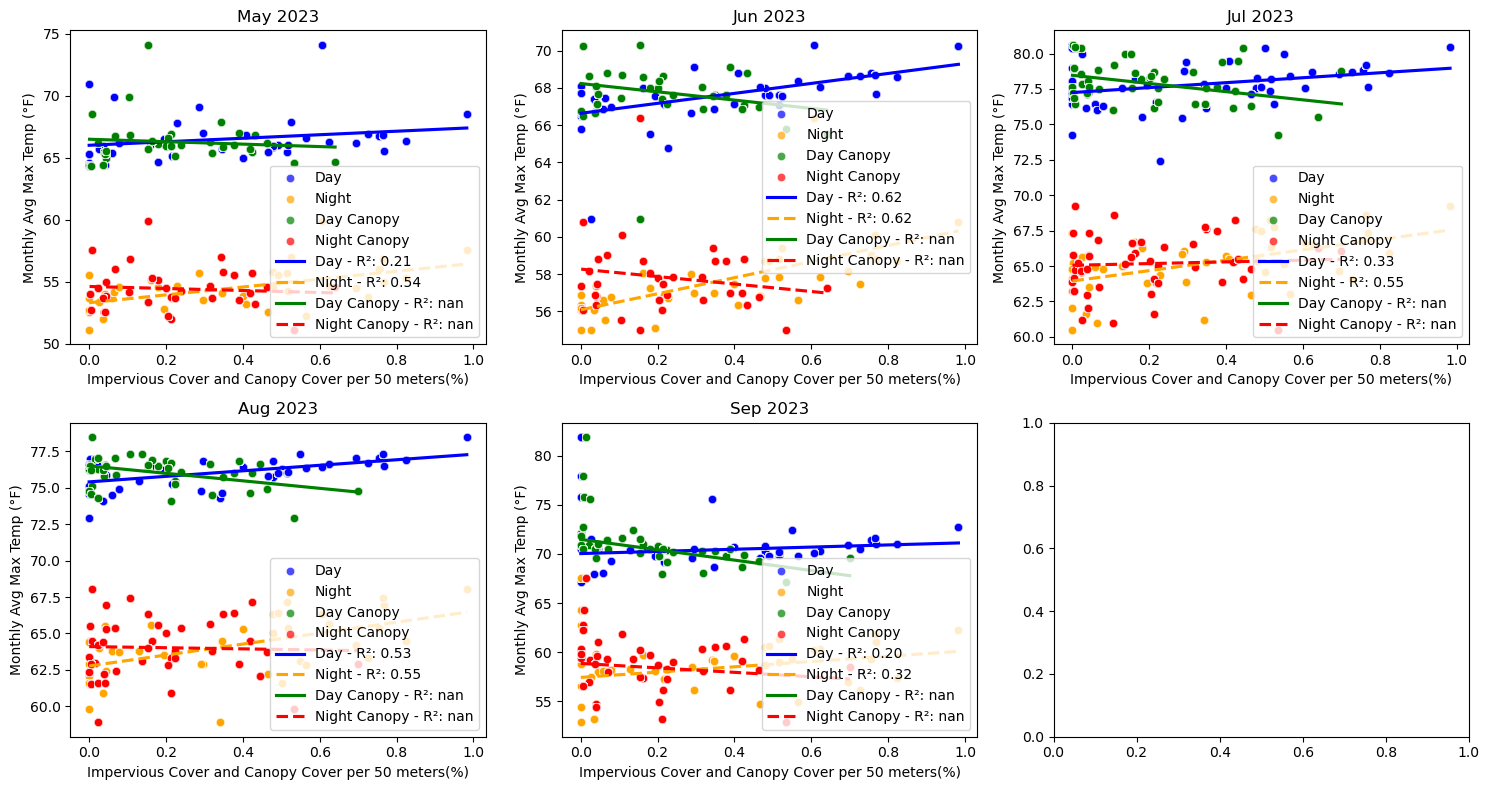

In [30]:
# Linear regression model 
# Create subplots to display scatter plots by month
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Loop through each month (assuming months are from 5 to 10)
for month in range(5, 11):  # Months 5 to 10
    row = (month - 5) // 3  # Adjust the row index
    col = (month - 5) % 3   # Adjust the column index

    # Subset day and night data for the current month
    day_month_data = day_data[day_data['month'] == month]
    night_month_data = night_data[night_data['month'] == month]

    if not day_month_data.empty and not night_month_data.empty:
        print(f"Month {month}, Day Data Shape: {day_month_data.shape}, Night Data Shape: {night_month_data.shape}")

        # Create a scatter plot of Impervious_percent_cover_50m vs. monthly_avg_mean_temp for day observations
        sns.scatterplot(data=day_month_data, x='Impervious_percent_cover_50m', y='daily_mean_temp_monthly_mean',
                        ax=axes[row, col], color='blue', label='Day', alpha=0.7)

        # Create a scatter plot of Impervious_percent_cover_50m vs. monthly_avg_mean_temp for night observations
        sns.scatterplot(data=night_month_data, x='Impervious_percent_cover_50m', y='daily_mean_temp_monthly_mean',
                        ax=axes[row, col], color='orange', label='Night', alpha=0.7)

        # Add canopy cover to the scatter plots
        sns.scatterplot(data=day_month_data, x='Canopy_percent_cover_50m', y='daily_mean_temp_monthly_mean',
                        ax=axes[row, col], color='green', label='Day Canopy', alpha=0.7)

        sns.scatterplot(data=night_month_data, x='Canopy_percent_cover_50m', y='daily_mean_temp_monthly_mean',
                        ax=axes[row, col], color='red', label='Night Canopy', alpha=0.7)

        # Calculate and plot linear regression lines using Seaborn's regplot
        day_slope, day_intercept, day_r_value, _, _ = linregress(day_month_data['Impervious_percent_cover_50m'], day_month_data['daily_mean_temp_monthly_mean'])
        night_slope, night_intercept, night_r_value, _, _ = linregress(night_month_data['Impervious_percent_cover_50m'], night_month_data['daily_mean_temp_monthly_mean'])
        day_canopy_slope, day_canopy_intercept, day_canopy_r_value, _, _ = linregress(day_month_data['Canopy_percent_cover_50m'], day_month_data['daily_mean_temp_monthly_mean'])
        night_canopy_slope, night_canopy_intercept, night_canopy_r_value, _, _ = linregress(night_month_data['Canopy_percent_cover_50m'], night_month_data['daily_mean_temp_monthly_mean'])

        print(f"Month {month}, Day Slope: {day_slope}, Night Slope: {night_slope}")
        print(f"Month {month}, Day Canopy Slope: {day_canopy_slope}, Night Canopy Slope: {night_canopy_slope}")

        sns.regplot(x='Impervious_percent_cover_50m', y='daily_mean_temp_monthly_mean', data=day_month_data, ci=None, scatter=False,
                    ax=axes[row, col], label=f'Day - R²: {day_r_value:.2f}', line_kws={'linestyle': '-', 'color': 'blue'})

        sns.regplot(x='Impervious_percent_cover_50m', y='daily_mean_temp_monthly_mean', data=night_month_data, ci=None, scatter=False,
                    ax=axes[row, col], label=f'Night - R²: {night_r_value:.2f}', line_kws={'linestyle': '--', 'color': 'orange'})

        sns.regplot(x='Canopy_percent_cover_50m', y='daily_mean_temp_monthly_mean', data=day_month_data, ci=None, scatter=False,
                    ax=axes[row, col], label=f'Day Canopy - R²: {day_canopy_r_value:.2f}', line_kws={'linestyle': '-', 'color': 'green'})

        sns.regplot(x='Canopy_percent_cover_50m', y='daily_mean_temp_monthly_mean', data=night_month_data, ci=None, scatter=False,
                    ax=axes[row, col], label=f'Night Canopy - R²: {night_canopy_r_value:.2f}', line_kws={'linestyle': '--', 'color': 'red'})

        axes[row, col].set_title(f'{calendar.month_abbr[month]} 2023')
        axes[row, col].set_xlabel('Impervious Cover and Canopy Cover per 50 meters(%)')
        axes[row, col].set_ylabel('Monthly Avg Max Temp (°F)')
        axes[row, col].legend()

# Adjust subplot layout
plt.tight_layout()
plt.show()


In [ ]:
import statsmodels.api as sm

# Prepare the independent variables (features)
X = merged_data[['Impervious_percent_cover_50m', 'Canopy_percent_cover_50m']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Prepare the dependent variable
y = merged_data['daily_mean_temp_monthly_mean']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


In [34]:
# Cateogry for regression model 

# Create a new DataFrame with selected columns
selected_columns = ['date_time', 'month', 'Time of Day', 'sensor_number', 'daily_mean_temp_monthly_mean', 'Impervious_percent_cover_50m', 'Canopy_percent_cover_50m']
selected_data = merged_data[selected_columns]

# Use pd.qcut to categorize impervious cover into three quantiles (tertiles)
selected_data['Impervious Category'] = pd.qcut(selected_data['Impervious_percent_cover_50m'], q=4, labels=['Low', 'Low-Medium', 'Medium-High', 'High'])

selected_data = selected_data.drop_duplicates(subset=['month', 'daily_mean_temp_monthly_mean'])

# Display the first few rows of the new DataFrame
selected_data


/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_76689/3446919463.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Impervious Category'] = pd.qcut(selected_data['Impervious_percent_cover_50m'], q=4, labels=['Low', 'Low-Medium', 'Medium-High', 'High'])


,date_time,month,Time of Day,sensor_number,daily_mean_temp_monthly_mean,Impervious_percent_cover_50m,Canopy_percent_cover_50m,Impervious Category
0,2023-07-01 00:00:00,7,Night,sensor_044a,64.689755,0.000000,0.0071,Low
3348,2023-07-01 07:00:00,7,Day,sensor_044a,76.431887,0.000000,0.0071,Low
8927,2023-08-01 00:00:00,8,Night,sensor_044a,64.470789,0.000000,0.0071,Low
12275,2023-08-01 07:00:00,8,Day,sensor_044a,75.143083,0.000000,0.0071,Low
17848,2023-09-01 00:00:00,9,Night,sensor_044a,64.288291,0.000000,0.0071,Low
...,...,...,...,...,...,...,...,...
1524186,2023-05-17 07:00:00,5,Day,sensor_043,67.854668,0.524354,0.3442,Medium-High
1526887,2023-06-01 00:00:00,6,Night,sensor_043,59.384389,0.524354,0.3442,Medium-High
1530127,2023-06-01 07:00:00,6,Day,sensor_043,67.584940,0.524354,0.3442,Medium-High
1535528,2023-07-01 00:00:00,7,Night,sensor_043,67.738910,0.524354,0.3442,Medium-High


In [35]:
# Canopy cover levels 
import pandas as pd

# Use pd.qcut to categorize canopy cover into four quantiles (quartiles)
selected_data['Canopy Category'] = pd.qcut(selected_data['Canopy_percent_cover_50m'], q=4, labels=['Low', 'Low-Medium', 'Medium-High', 'High'])
selected_data

,date_time,month,Time of Day,sensor_number,daily_mean_temp_monthly_mean,Impervious_percent_cover_50m,Canopy_percent_cover_50m,Impervious Category,Canopy Category
0,2023-07-01 00:00:00,7,Night,sensor_044a,64.689755,0.000000,0.0071,Low,Low
3348,2023-07-01 07:00:00,7,Day,sensor_044a,76.431887,0.000000,0.0071,Low,Low
8927,2023-08-01 00:00:00,8,Night,sensor_044a,64.470789,0.000000,0.0071,Low,Low
12275,2023-08-01 07:00:00,8,Day,sensor_044a,75.143083,0.000000,0.0071,Low,Low
17848,2023-09-01 00:00:00,9,Night,sensor_044a,64.288291,0.000000,0.0071,Low,Low
...,...,...,...,...,...,...,...,...,...
1524186,2023-05-17 07:00:00,5,Day,sensor_043,67.854668,0.524354,0.3442,Medium-High,High
1526887,2023-06-01 00:00:00,6,Night,sensor_043,59.384389,0.524354,0.3442,Medium-High,High
1530127,2023-06-01 07:00:00,6,Day,sensor_043,67.584940,0.524354,0.3442,Medium-High,High
1535528,2023-07-01 00:00:00,7,Night,sensor_043,67.738910,0.524354,0.3442,Medium-High,High


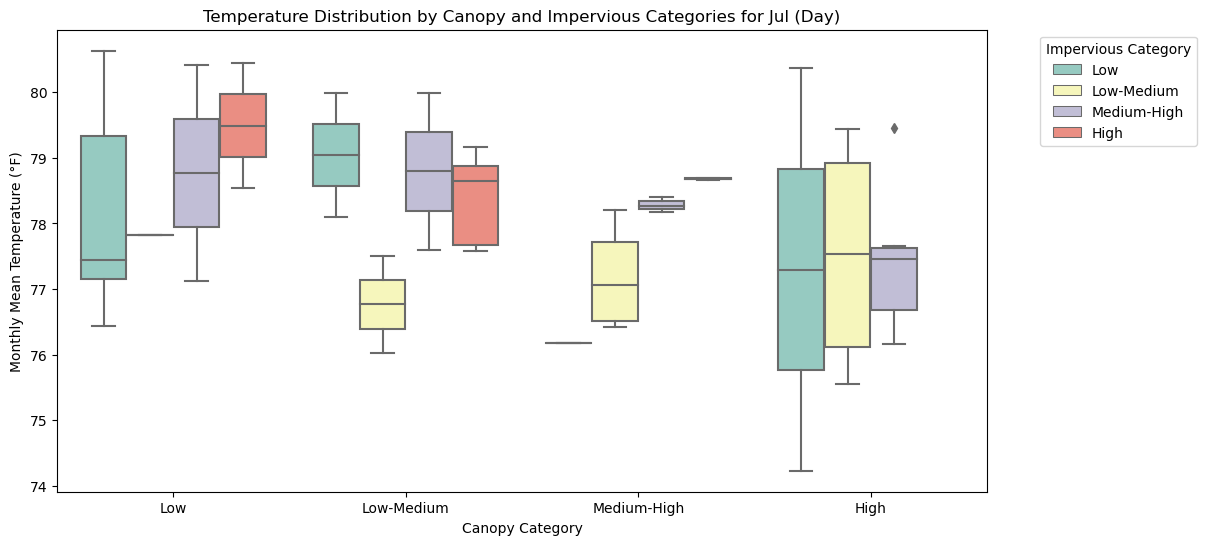

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for a specific month and time of day
selected_month = 7  # Specify your desired month
selected_time_of_day = 'Day'  # Specify your desired time of day
filtered_data = selected_data[(selected_data['month'] == selected_month) & (selected_data['Time of Day'] == selected_time_of_day)]

# Create a box plot with separate facets for Canopy and Impervious categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Canopy Category', y='daily_mean_temp_monthly_mean', hue='Impervious Category', data=filtered_data, palette='Set3')

# Customize labels and title
plt.xlabel('Canopy Category')
plt.ylabel('Monthly Mean Temperature (°F)')
plt.title(f'Temperature Distribution by Canopy and Impervious Categories for {calendar.month_abbr[selected_month]} ({selected_time_of_day})')

# Show the plot
plt.legend(title='Impervious Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# Original linear regression model 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Define a custom color palette for the Impervious Categories
palette = {'High': 'red', 'Medium': 'orange', 'Low': 'blue', 'Low-Medium': 'green', 'Medium-High': 'orange'}

# Filter data for a specific month and Time of Day (e.g., July and 'Day')
selected_month = 7
selected_time_of_day = 'Day'
filtered_data = selected_data[(selected_data['month'] == selected_month) & (selected_data['Time of Day'] == selected_time_of_day)]

# Create a scatter plot with color-coded impervious categories using the custom palette
sns.scatterplot(data=filtered_data, x='Canopy_percent_cover_50m', y='daily_min_temp_monthly_mean', hue='Impervious Category', palette=palette)

# Fit a linear regression model with missing='drop' argument
X = filtered_data[['Canopy_percent_cover_50m']]
X = sm.add_constant(X)  # Add a constant for the intercept
y = filtered_data['daily_min_temp_monthly_mean']
model = sm.OLS(y, X, missing='drop').fit()

# Plot the regression line
sns.regplot(x='Canopy_percent_cover_50m', y='daily_min_temp_monthly_mean', data=filtered_data, ci=None, scatter=False, line_kws={'linestyle': '-', 'color': 'black'})

# Display the R-squared value
plt.annotate(f'R²: {model.rsquared:.2f}', xy=(0.1, 0.9), xycoords='axes fraction')

# Customize the plot
plt.title(f"Monthly Temperature vs Canopy Cover for {calendar.month_abbr[selected_month]} ({selected_time_of_day})")
plt.xlabel('Canopy Cover (%)')
plt.ylabel('Monthly Mean Temperature (°F)')

# Show the legend
plt.legend(title='Impervious Category')

# Show the plot
plt.show()


In [59]:
# Linear model with lines for each cover class 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Define a custom color palette for the Impervious Categories
palette = {'High': 'red', 'Low': 'blue', 'Low-Medium': 'green', 'Medium-High': 'orange'}

# Filter data for a specific month and Time of Day (e.g., July and 'Day')
selected_month = 8
selected_time_of_day = 'Day'
filtered_data = selected_data[(selected_data['month'] == selected_month) & (selected_data['Time of Day'] == selected_time_of_day)]

# Drop rows with missing or invalid values (inf or nans)
filtered_data = filtered_data.dropna(subset=['Canopy_percent_cover_50m', 'daily_mean_temp_monthly_mean'])

# Create a scatter plot with color-coded impervious categories using the custom palette
sns.scatterplot(data=filtered_data, x='Canopy_percent_cover_50m', y='daily_mean_temp_monthly_mean', hue='Impervious Category', palette=palette)

# Initialize a dictionary to store regression models
regression_models = {}

# Define colors for lines in the legend
line_colors = {'High': 'red', 'Low': 'blue', 'Low-Medium': 'green', 'Medium-High': 'orange'}

# Iterate over unique impervious categories and create separate regressions
for impervious_category in filtered_data['Impervious Category'].unique():
    category_data = filtered_data[filtered_data['Impervious Category'] == impervious_category]
    X = category_data[['Canopy_percent_cover_50m']]
    X = sm.add_constant(X)  # Add a constant for the intercept
    y = category_data['daily_mean_temp_monthly_mean']
    model = sm.OLS(y, X).fit()
    regression_models[impervious_category] = model

    # Plot the regression line for this category with specified line color
    sns.regplot(x='Canopy_percent_cover_50m', y='daily_mean_temp_monthly_mean', data=category_data, ci=None, scatter=False,
                label=f'{impervious_category} - R²: {model.rsquared:.2f}', line_kws={'linestyle': '-', 'color': line_colors[impervious_category]})

# Customize the plot
plt.title(f"Monthly Mean Temperature vs Canopy Cover for {calendar.month_abbr[selected_month]} ({selected_time_of_day}) 2022")
plt.xlabel('Canopy Cover per 50 meters (%)')
plt.ylabel('Monthly Mean Temperature (°F)')

# Move the legend to the side
plt.legend(title='Impervious Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


NameError: name 'selected_data' is not defined

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_33544/99979546.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Impervious Category'] = pd.qcut(selected_data['avg_impervious'], q=4, labels=['Low', 'Low-Medium', 'Medium-High', 'High'])


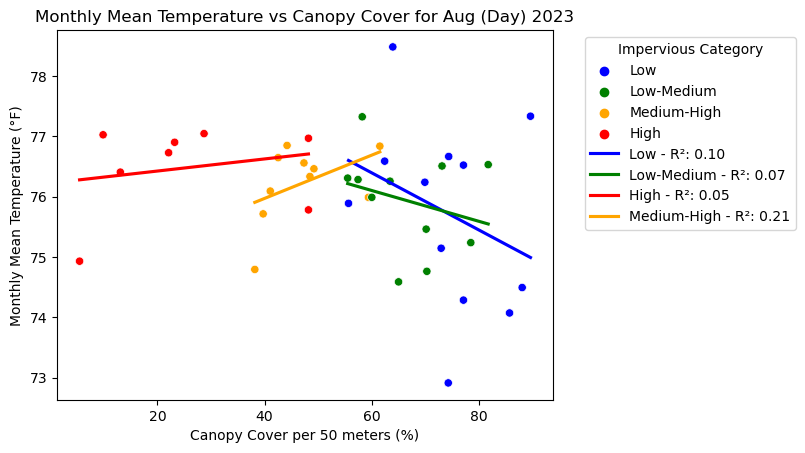

In [77]:
# Cateogry for regression model - ground veg

# Create a new DataFrame with selected columns
selected_columns = ['date_time', 'month', 'Time of Day', 'sensor_number', 'daily_mean_temp_monthly_mean', 'avg_green', 'avg_impervious']
selected_data = merged_data[selected_columns]

# Use pd.qcut to categorize impervious cover into three quantiles (tertiles)
selected_data['Impervious Category'] = pd.qcut(selected_data['avg_impervious'], q=4, labels=['Low', 'Low-Medium', 'Medium-High', 'High'])

selected_data = selected_data.drop_duplicates(subset=['month', 'daily_mean_temp_monthly_mean'])

# Display the first few rows of the new DataFrame
selected_data

# Define a custom color palette for the Impervious Categories
palette = {'High': 'red', 'Low': 'blue', 'Low-Medium': 'green', 'Medium-High': 'orange'}

# Filter data for a specific month and Time of Day (e.g., July and 'Day')
selected_month = 8
selected_time_of_day = 'Day'
filtered_data = selected_data[(selected_data['month'] == selected_month) & (selected_data['Time of Day'] == selected_time_of_day)]

# Drop rows with missing or invalid values (inf or nans)
filtered_data = filtered_data.dropna(subset=['avg_green', 'daily_mean_temp_monthly_mean'])

# Create a scatter plot with color-coded impervious categories using the custom palette
sns.scatterplot(data=filtered_data, x='avg_green', y='daily_mean_temp_monthly_mean', hue='Impervious Category', palette=palette)

# Initialize a dictionary to store regression models
regression_models = {}

# Define colors for lines in the legend
line_colors = {'High': 'red', 'Low': 'blue', 'Low-Medium': 'green', 'Medium-High': 'orange'}

# Iterate over unique impervious categories and create separate regressions
for impervious_category in filtered_data['Impervious Category'].unique():
    category_data = filtered_data[filtered_data['Impervious Category'] == impervious_category]
    X = category_data[['avg_green']]
    X = sm.add_constant(X)  # Add a constant for the intercept
    y = category_data['daily_mean_temp_monthly_mean']
    model = sm.OLS(y, X).fit()
    regression_models[impervious_category] = model

    # Plot the regression line for this category with specified line color
    sns.regplot(x='avg_green', y='daily_mean_temp_monthly_mean', data=category_data, ci=None, scatter=False,
                label=f'{impervious_category} - R²: {model.rsquared:.2f}', line_kws={'linestyle': '-', 'color': line_colors[impervious_category]})

# Customize the plot
plt.title(f"Monthly Mean Temperature vs Canopy Cover for {calendar.month_abbr[selected_month]} ({selected_time_of_day}) 2023")
plt.xlabel('Canopy Cover per 50 meters (%)')
plt.ylabel('Monthly Mean Temperature (°F)')

# Move the legend to the side
plt.legend(title='Impervious Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


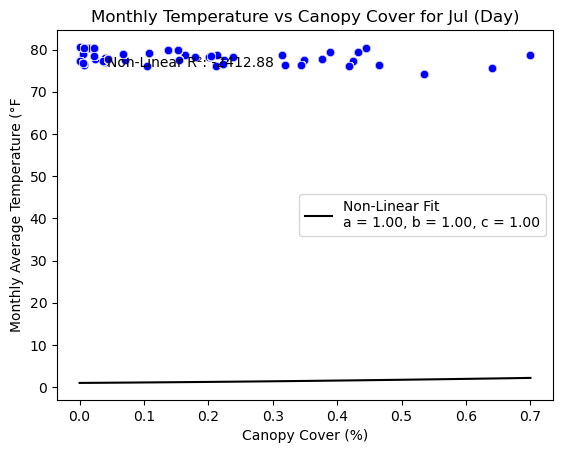

In [66]:
# None straight line regression fit 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import linregress

# Specify the month and time of day you want to analyze
selected_month = 7
selected_time_of_day = 'Day'

# Filter the data for the selected month and time of day
filtered_data = merged_data[(merged_data['month'] == selected_month) & (merged_data['Time of Day'] == selected_time_of_day)]

# Create a scatter plot using the given values
sns.scatterplot(data=filtered_data, x='Canopy_percent_cover_50m', y='daily_mean_temp_monthly_mean', color='blue', alpha=0.7)

# Define a non-linear function to fit
def non_linear_function(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the non-linear function to the data
params, covariance = curve_fit(non_linear_function, filtered_data['Canopy_percent_cover_50m'], filtered_data['daily_mean_temp_monthly_mean'])
a, b, c = params

# Generate x values for the curve
x_curve = np.linspace(filtered_data['Canopy_percent_cover_50m'].min(), filtered_data['Canopy_percent_cover_50m'].max(), 100)

# Calculate y values for the curve
y_curve = non_linear_function(x_curve, a, b, c)

# Plot the non-linear curve
plt.plot(x_curve, y_curve, linestyle='-', color='black', label=f'Non-Linear Fit\na = {a:.2f}, b = {b:.2f}, c = {c:.2f}')

# Calculate and plot the R-squared value for the non-linear fit
residuals = filtered_data['daily_mean_temp_monthly_mean'] - non_linear_function(filtered_data['Canopy_percent_cover_50m'], a, b, c)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((filtered_data['daily_mean_temp_monthly_mean'] - np.mean(filtered_data['daily_mean_temp_monthly_mean']))**2)
r_squared = 1 - (ss_res / ss_tot)

plt.annotate(f'Non-Linear R²: {r_squared:.2f}', xy=(0.1, 0.9), xycoords='axes fraction')

# Customize the plot
plt.title(f"Monthly Temperature vs Canopy Cover for {calendar.month_abbr[selected_month]} ({selected_time_of_day})")
plt.xlabel('Canopy Cover (%)')
plt.ylabel('Monthly Average Temperature (°F')

# Show the legend
plt.legend()

# Show the plot
plt.show()



/Users/rebeccamchugh/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


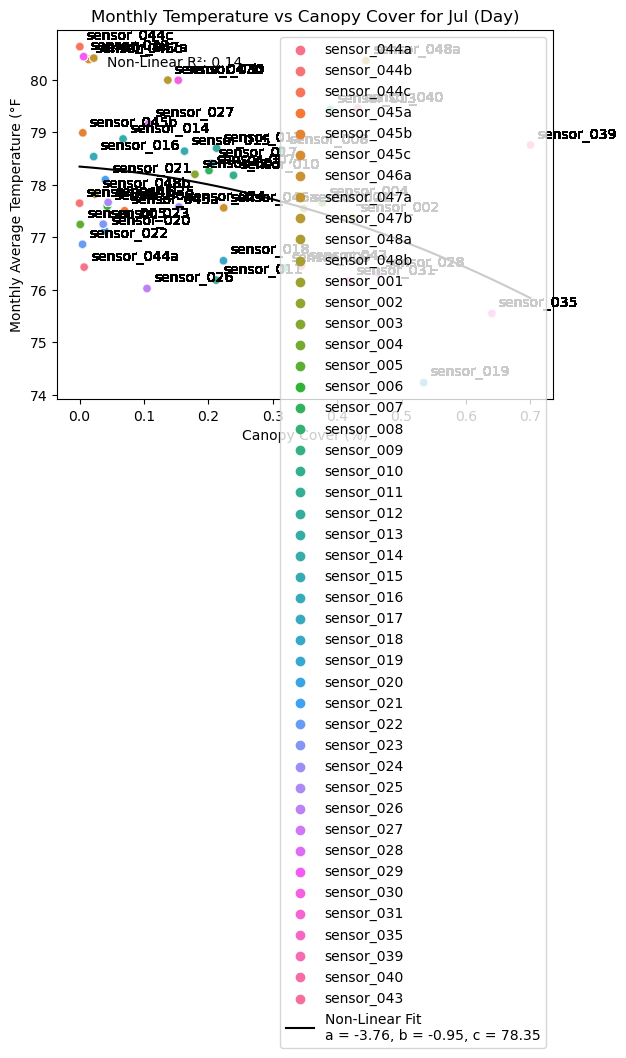

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import linregress
import calendar

# Specify the month and time of day you want to analyze
selected_month = 7
selected_time_of_day = 'Day'

# Filter the data for the selected month and time of day
filtered_data = merged_data[(merged_data['month'] == selected_month) & (merged_data['Time of Day'] == selected_time_of_day)]

# Create a scatter plot using the given values
sns.scatterplot(data=filtered_data, x='Canopy_percent_cover_50m', y='daily_mean_temp_monthly_mean', hue='sensor_number', alpha=0.7)

# Define a non-linear function to fit
def non_linear_function(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the non-linear function to the data
params, covariance = curve_fit(non_linear_function, filtered_data['Canopy_percent_cover_50m'], filtered_data['daily_mean_temp_monthly_mean'])
a, b, c = params

# Generate x values for the curve
x_curve = np.linspace(filtered_data['Canopy_percent_cover_50m'].min(), filtered_data['Canopy_percent_cover_50m'].max(), 100)

# Calculate y values for the curve
y_curve = non_linear_function(x_curve, a, b, c)

# Plot the non-linear curve
plt.plot(x_curve, y_curve, linestyle='-', color='black', label=f'Non-Linear Fit\na = {a:.2f}, b = {b:.2f}, c = {c:.2f}')

# Calculate and plot the R-squared value for the non-linear fit
residuals = filtered_data['daily_mean_temp_monthly_mean'] - non_linear_function(filtered_data['Canopy_percent_cover_50m'], a, b, c)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((filtered_data['daily_mean_temp_monthly_mean'] - np.mean(filtered_data['daily_mean_temp_monthly_mean']))**2)
r_squared = 1 - (ss_res / ss_tot)

plt.annotate(f'Non-Linear R²: {r_squared:.2f}', xy=(0.1, 0.9), xycoords='axes fraction')

# Label sensor IDs
for index, row in filtered_data.iterrows():
    plt.annotate(row['sensor_number'], (row['Canopy_percent_cover_50m'], row['daily_mean_temp_monthly_mean']), textcoords='offset points', xytext=(5,5))

# Customize the plot
plt.title(f"Monthly Temperature vs Canopy Cover for {calendar.month_abbr[selected_month]} ({selected_time_of_day})")
plt.xlabel('Canopy Cover (%)')
plt.ylabel('Monthly Average Temperature (°F')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [29]:
tree = pd.read_csv('air-temp-raw-data-2022-2023/tree_abundance .csv')
tree.groupby('ID')
tree.rename(columns={'tree-type-1': 'tree_type', 'distance-1': 'distance', 'tree-count': 'tree_count'}, inplace=True)
tree['tree_type'] = tree['tree_type'].str.strip()
tree

,ID,Name,Location,tree_type,distance,tree_count,Notes,Unnamed: 7,Unnamed: 8
0,001,Senior Living Facility,"(40.01529, -105.28639)",Malus,2.44,11.0,12 -15 :seemed small but not necessarily shrub...,NaN,NaN
1,NaN,NaN,NaN,Pinus,11.93,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Pinus,12.94,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Elaeagnus,15.11,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Quercus,7.11,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
unique_tree_types = tree['tree_type'].unique()
print(unique_tree_types)


['Malus' 'Pinus' 'Elaeagnus' 'Quercus' 'Rhamnus' 'Fraxinus' 'Tilia' 'Acer'
 'Aesculus' 'Gymnocladus' 'Pyrus' 'Catalpa' 'Ulmus' 'Morus' 'Gleditsia'
 'Picea' 'Honeylocust' 'Blue Picea' 'Boxelder' 'American Ulmus'
 'Shamel Fraxinus' 'Douglas fir' 'Salix' 'Siberian Ulmus' 'Populus'
 'Green Fraxinus' 'Red horse Castanea' 'Spruce' 'Prunus' 'Crataegus'
 'Juniperus' 'Populuss' 'Celtis' 'Robinia' 'Cercis'
 'Malus (Malus or Malus)']


In [40]:
# Assign tree names 
tree_category_mapping = {
    'Spruce': 'Picea',
    'Green Fraxinus': 'Fraxinus',
    'American Ulmus': 'Ulmus',
    'Blue Picea': 'Picea',
    'Siberian Ulmus': 'Ulmus',
    'Douglas fir': 'Pseudotsuga',
    'Red horse Castanea': 'Castanea',
    'Shamel Fraxinus': 'Fraxinus',
    'Honeylocust': 'Gleditsia',
    'Malus (Malus or Malus)': 'Malus',
    'Populuss': 'Populus',
    'Boxelder': 'Acer'
    # Add more species and their categories here
}
tree['tree_category'] = tree['tree_type'].replace(tree_category_mapping)
tree

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_59729/1741216056.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree['tree_category'] = tree['tree_type'].replace(tree_category_mapping)


,ID,Name,Location,tree_type,distance,tree_count,Notes,Unnamed: 7,Unnamed: 8,tree_category
0,001,Senior Living Facility,"(40.01529, -105.28639)",Malus,2.44,11.0,12 -15 :seemed small but not necessarily shrub...,NaN,NaN,Malus
1,001,NaN,NaN,Pinus,11.93,NaN,NaN,NaN,NaN,Pinus
2,001,NaN,NaN,Pinus,12.94,NaN,NaN,NaN,NaN,Pinus
3,001,NaN,NaN,Elaeagnus,15.11,NaN,NaN,NaN,NaN,Elaeagnus
4,001,NaN,NaN,Quercus,7.11,NaN,NaN,NaN,NaN,Quercus
...,...,...,...,...,...,...,...,...,...,...
427,048b,NaN,NaN,Salix,18.87,NaN,NaN,NaN,NaN,Salix
428,048b,NaN,NaN,Salix,20.27,NaN,NaN,NaN,NaN,Salix
429,048b,NaN,NaN,Salix,23.01,NaN,NaN,NaN,NaN,Salix
430,048b,NaN,NaN,Salix,23.77,NaN,NaN,NaN,NaN,Salix


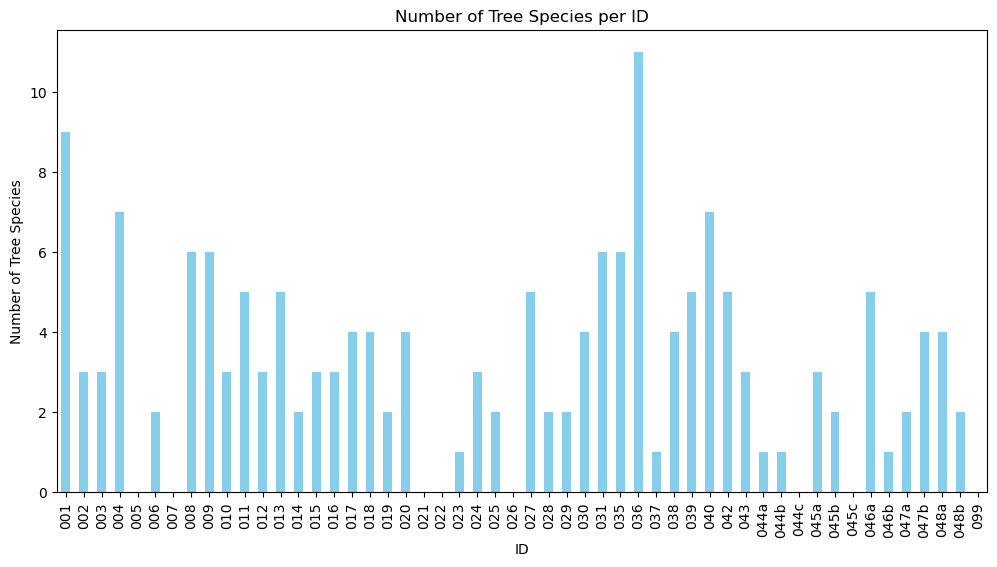

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Your DataFrame
# Assuming your DataFrame is named 'tree_df'

# Forward-fill the 'ID' column to ensure each group has the same 'ID'
tree['ID'].fillna(method='ffill', inplace=True)

# Group the data by 'ID' and count unique tree types
tree_counts = tree.groupby('ID')['tree_type'].nunique()

# Plot the data
plt.figure(figsize=(12, 6))
tree_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Tree Species per ID')
plt.xlabel('ID')
plt.ylabel('Number of Tree Species')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Your DataFrame
# Assuming your DataFrame is named 'tree_df'

# Filter the data for a specific sensor 'ID'
sensor_id = '036'
sensor_data = tree[tree['ID'] == sensor_id]

# Count unique tree types for the sensor
tree_counts = sensor_data['tree_type'].value_counts()

# Plot the data
plt.figure(figsize=(12, 6))
tree_counts.plot(kind='bar', color='skyblue')
plt.title(f'Tree Species for Sensor ID {sensor_id}')
plt.xlabel('Tree Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


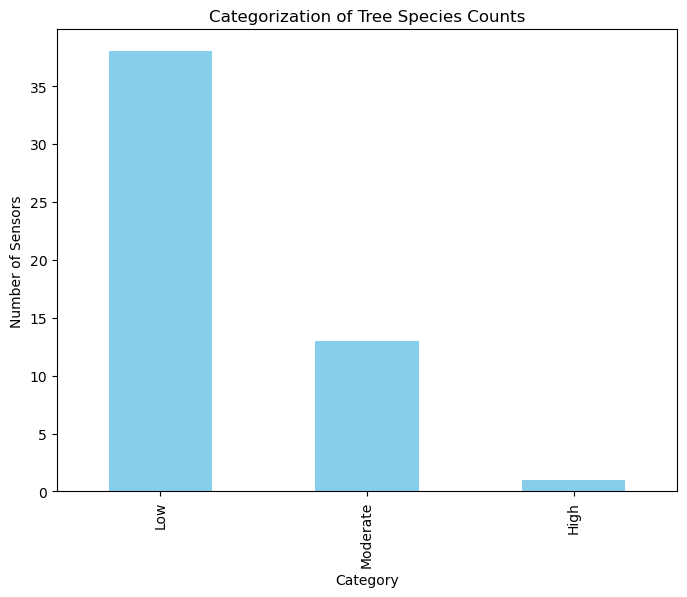

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Your DataFrame
# Assuming your DataFrame is named 'tree_df'

# Forward-fill the 'ID' column to ensure each group has the same 'ID'
tree['ID'].fillna(method='ffill', inplace=True)

# Group the data by 'ID' and count unique tree types
tree_counts = tree.groupby('ID')['tree_type'].nunique()

# Define your criteria for categorizing into high, moderate, and low
# You can adjust these thresholds as needed
high_threshold = 10
moderate_threshold = 5

# Categorize based on the thresholds
def categorize_count(count):
    if count >= high_threshold:
        return 'High'
    elif count >= moderate_threshold:
        return 'Moderate'
    else:
        return 'Low'

# Apply the categorization to create a new column
tree_counts['Species Category'] = tree_counts.apply(categorize_count)

# Count the number of sensors in each category
category_counts = tree_counts['Species Category'].value_counts()

# Plot the data
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Categorization of Tree Species Counts')
plt.xlabel('Category')
plt.ylabel('Number of Sensors')
plt.show()


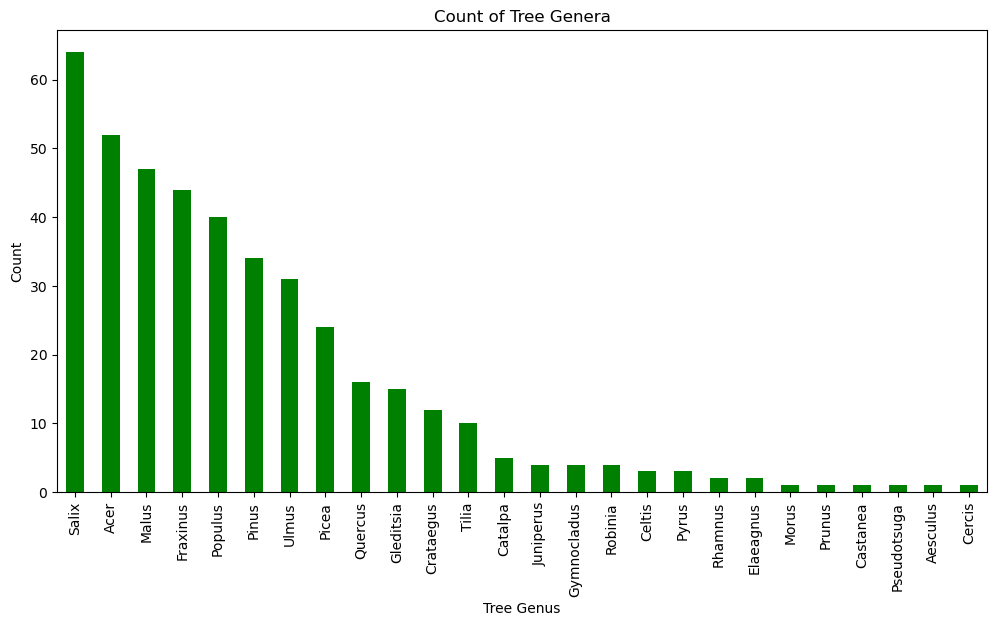

In [34]:
# Count of tree genus

# Remove the 'NaN' values in the 'tree_type' column
tree = tree.dropna(subset=['tree_type'])

# Count the occurrences of each mapped tree category
tree_counts = tree['tree_category'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
tree_counts.plot(kind='bar', color='green')
plt.title("Count of Tree Genera")
plt.xlabel('Tree Genus')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()



In [48]:
filtered_anomaly_data = anomaly_data[(anomaly_data['month'] == 7) & (anomaly_data['Time of Day'] == 'Day')]
filtered_anomaly_data

,ID,month,Time of Day,daily_mean_temp_monthly_mean,all_sensors_monthly_mean,temperature_anomaly
3348,sensor_044a,7,Day,76.431887,77.920725,-1.488837
3349,sensor_044a,7,Day,76.431887,77.920725,-1.488837
3350,sensor_044a,7,Day,76.431887,77.920725,-1.488837
3351,sensor_044a,7,Day,76.431887,77.920725,-1.488837
3352,sensor_044a,7,Day,76.431887,77.920725,-1.488837
...,...,...,...,...,...,...
1446684,sensor_043,7,Day,76.449444,77.920725,-1.471281
1446685,sensor_043,7,Day,76.449444,77.920725,-1.471281
1446686,sensor_043,7,Day,76.449444,77.920725,-1.471281
1446687,sensor_043,7,Day,76.449444,77.920725,-1.471281


In [49]:
# Merge tree and temp anomaly_data
# Assuming you have 'tree' and 'filtered_anomaly_data' DataFrames
tree_temps = tree.copy()  # Create a copy of the 'tree' DataFrame

# Extract the sensor ID from the 'ID' column in 'filtered_anomaly_data'
filtered_anomaly_data['sensor_id'] = filtered_anomaly_data['ID'].str.extract(r'sensor_(\d+)')

# Create a mapping between sensor IDs and temperature anomalies
sensor_id_to_anomaly = filtered_anomaly_data[['sensor_id', 'temperature_anomaly']].drop_duplicates()

# Merge 'tree' with 'sensor_id_to_anomaly' using 'ID' from 'tree' and 'sensor_id' from 'sensor_id_to_anomaly'
tree_temps = tree_temps.merge(sensor_id_to_anomaly, left_on='ID', right_on='sensor_id', how='left')

# Drop the 'sensor_id' column if it's not needed
tree_temps.drop('sensor_id', axis=1, inplace=True)
# Remove leading and trailing spaces from the 'tree_type' column
tree_temps['tree_type'] = tree_temps['tree_type'].str.strip()

tree_temps

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_59729/2248069280.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_anomaly_data['sensor_id'] = filtered_anomaly_data['ID'].str.extract(r'sensor_(\d+)')


,ID,Name,Location,tree_type,distance,tree_count,Notes,Unnamed: 7,Unnamed: 8,tree_category,temperature_anomaly
0,001,Senior Living Facility,"(40.01529, -105.28639)",Malus,2.44,11.0,12 -15 :seemed small but not necessarily shrub...,NaN,NaN,Malus,-0.374616
1,001,NaN,NaN,Pinus,11.93,NaN,NaN,NaN,NaN,Pinus,-0.374616
2,001,NaN,NaN,Pinus,12.94,NaN,NaN,NaN,NaN,Pinus,-0.374616
3,001,NaN,NaN,Elaeagnus,15.11,NaN,NaN,NaN,NaN,Elaeagnus,-0.374616
4,001,NaN,NaN,Quercus,7.11,NaN,NaN,NaN,NaN,Quercus,-0.374616
...,...,...,...,...,...,...,...,...,...,...,...
417,048b,NaN,NaN,Salix,18.87,NaN,NaN,NaN,NaN,Salix,NaN
418,048b,NaN,NaN,Salix,20.27,NaN,NaN,NaN,NaN,Salix,NaN
419,048b,NaN,NaN,Salix,23.01,NaN,NaN,NaN,NaN,Salix,NaN
420,048b,NaN,NaN,Salix,23.77,NaN,NaN,NaN,NaN,Salix,NaN


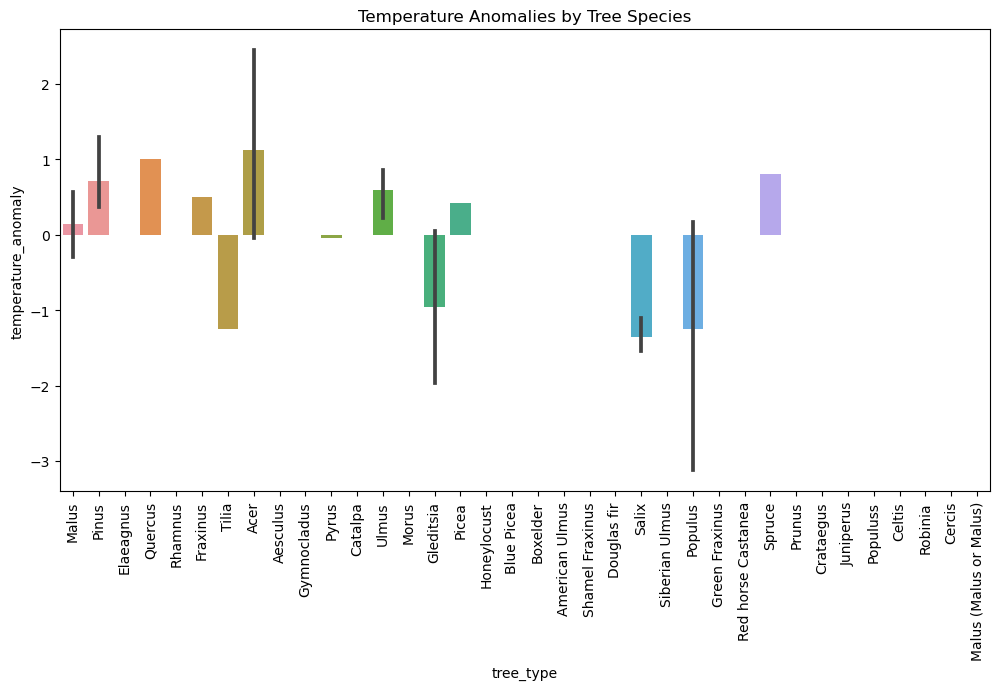

In [64]:
# Data Cleaning
tree_temps.drop(['Location', 'Unnamed: 7', 'Unnamed: 8'], axis=1, inplace=True)

# Data Exploration
summary_statistics = tree_temps['temperature_anomaly'].describe()
unique_tree_species = tree_temps['tree_type'].unique()

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart of temperature anomalies by tree species
plt.figure(figsize=(12, 6))
sns.barplot(x='tree_type', y='temperature_anomaly', data=tree_temps)
plt.title('Temperature Anomalies by Tree Species')
plt.xticks(rotation=90)
plt.show()

# Grouping and Aggregation
tree_species_stats = tree_temps.groupby('tree_type')['temperature_anomaly'].mean()

# Hypothesis Testing (Example: t-test)
from scipy.stats import ttest_ind
tree_species_A = tree_temps[tree_temps['tree_type'] == 'TreeTypeA']['temperature_anomaly']
tree_species_B = tree_temps[tree_temps['tree_type'] == 'TreeTypeB']['temperature_anomaly']
t_stat, p_value = ttest_ind(tree_species_A, tree_species_B)

# Time Series Analysis (if applicable)
# Perform time series analysis on temperature anomalies over time.

# Geospatial Analysis (if applicable)
# Use geospatial libraries to create maps showing tree species and temperature anomalies.


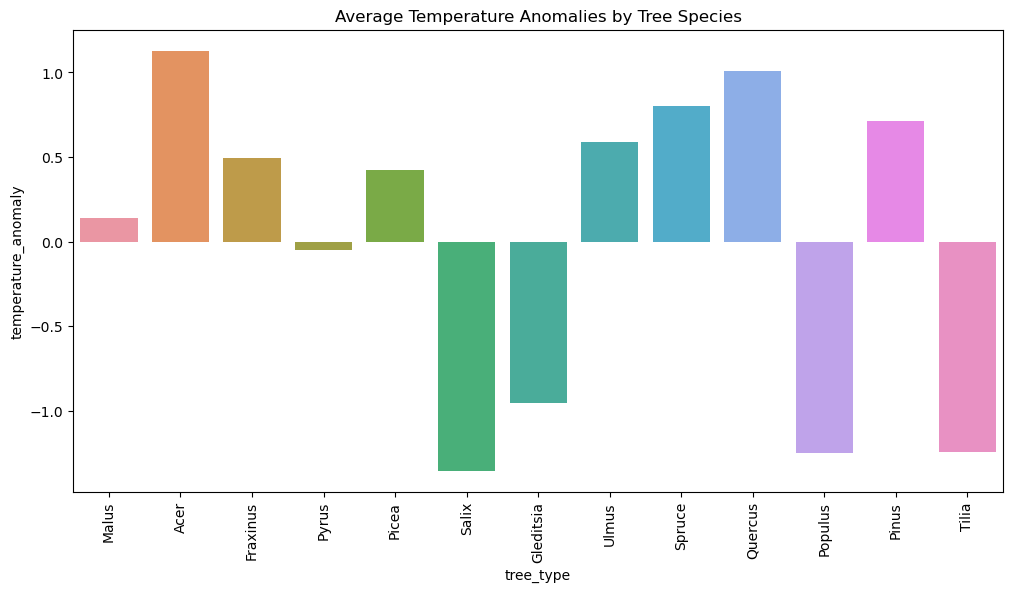

In [33]:
# Average temp anom 

# Filter unique tree species based on non-null temperature anomaly values
unique_tree_species = tree_temps[~tree_temps['temperature_anomaly'].isna()]['tree_type'].unique()

# Filter tree_temps to include only rows with unique tree species and non-null temperature anomaly values
filtered_tree_temps = tree_temps[tree_temps['tree_type'].isin(unique_tree_species)]

# Calculate the average temperature anomaly for each unique tree species
average_temperatures = filtered_tree_temps.groupby('tree_type')['temperature_anomaly'].mean().reset_index()

# Create a bar chart of the average temperature anomalies by tree species
plt.figure(figsize=(12, 6))
sns.barplot(x='tree_type', y='temperature_anomaly', data=average_temperatures, order=unique_tree_species)
plt.title('Average Temperature Anomalies by Tree Species')
plt.xticks(rotation=90)
plt.show()


In [66]:
unique_tree_types = tree['tree_category'].unique()
print(unique_tree_types)

['Malus' 'Pinus' 'Elaeagnus' 'Quercus' 'Rhamnus' 'Fraxinus' 'Tilia' 'Acer'
 'Aesculus' 'Gymnocladus' 'Pyrus' 'Catalpa' 'Ulmus' 'Morus' 'Gleditsia'
 'Picea' 'Boxelder' 'Pseudotsuga' 'Salix' 'Populus' 'Castanea' 'Prunus'
 'Crataegus' 'Juniperus' 'Celtis' 'Robinia' 'Cercis']


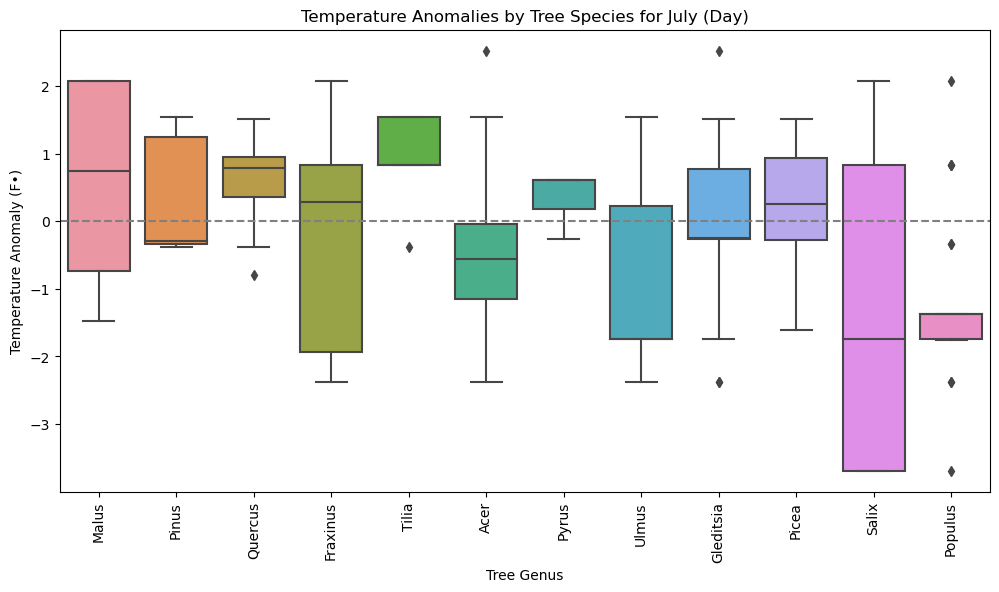

In [51]:
# Filter tree_temps to include only rows with unique tree species and non-null temperature anomaly values
filtered_tree_temps = tree_temps[tree_temps['tree_category'].notna()]

# Remove 'crataegus' tree type from the filtered DataFrame
values_to_remove = ['Crataegus', 'Castanea', 'Prunus', 'Juniperus', 'Celtis', 'Robinia', 'Cercis', 'Boxelder', 'Pseudotsuga', 'Aesculus', 'Gymnocladus', 'Elaeagnus', 'Morus', 'Catalpa', 'Rhamnus']
filtered_tree_temps = filtered_tree_temps[~filtered_tree_temps['tree_category'].isin(values_to_remove)]

# Create the box plot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='tree_category', y='temperature_anomaly', data=filtered_tree_temps)

# Set the title
plt.title('Temperature Anomalies by Tree Species for July (Day)')

# Set the x and y labels
ax.set(xlabel='Tree Genus', ylabel='Temperature Anomaly (F•)')

# Add a grey dashed line at zero
plt.axhline(y=0, color='grey', linestyle='--')

plt.xticks(rotation=90)
plt.show()


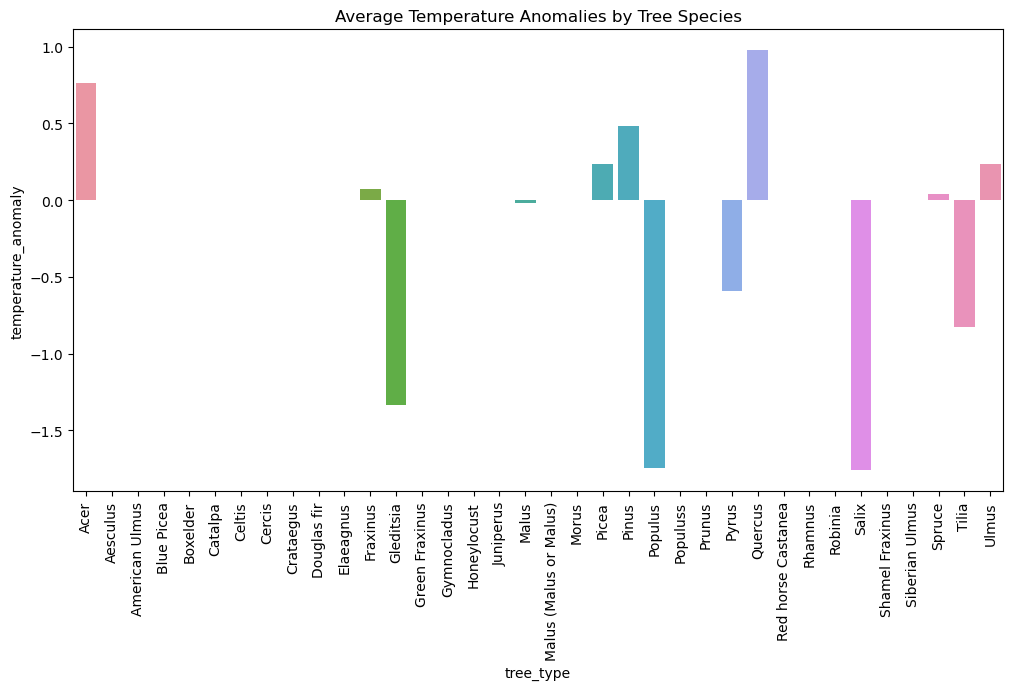

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'tree_temps' with 'tree_type' and 'temperature_anomaly' columns

# Group the data by 'tree_type' and calculate the mean temperature anomaly
aggregated_data = tree_temps.groupby('tree_type')['temperature_anomaly'].mean().reset_index()

# Create a bar chart of the average temperature anomalies by tree species
plt.figure(figsize=(12, 6))
sns.barplot(x='tree_type', y='temperature_anomaly', data=aggregated_data)
plt.title('Average Temperature Anomalies by Tree Species')
plt.xticks(rotation=90)
plt.show()
